# Status + LTD

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
import pandas as pd
import scipy.special
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf
import os

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 

from analyze_simulations_funs import *

In [3]:
outputs_dir_test = Path("../../outputs/LtdStatus/outputs/test2")
# outputs_dir = Path("../../outputs/LtdStatus/outputs/anal")
# outputs_dir_new = Path("../../outputs/LtdStatus/outputs/n100")
# outputs_dir_sepa = Path("../../outputs/LtdStatus/outputs/sepa_0_2")
outputs_dir_triads_slash = Path("../../outputs/LtdReal/outputs/slash-s400-triads")
outputs_dir_triads_wiki = Path("../../outputs/LtdReal/outputs/wiki-s400-triads")
outputs_dir_triads_wiki1000 = Path("../../outputs/LtdReal/outputs/wiki-s1000-triads")
# outputs_dir_triads_long = Path("../../outputs/LtdStatus/outputs/triads_distr_long")
# outputs_dir_triads_n100 = Path("../../outputs/LtdStatus/outputs/triads_distr_n100")
outputs_dir_triads_wiki2 = Path("../../outputs/LtdReal/outputs/wiki2-s400-triads")
outputs_dir_triads_wiki2_1000 = Path("../../outputs/LtdReal/outputs/wiki2-s1000-triads")
outputs_slash_rhoinits = Path("../../outputs/LtdReal/outputs/slash-rhoinits-triads")
outputs_epi_rhoinits = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads")
outputs_sam_rhoinits = Path("../../outputs/LtdReal/outputs/sampson-rhoinits-triads")

## Process data

### Too many rows of data

In [9]:
avg_max_num_rows = 10000
fpath = "../../outputs/LtdReal/outputs/sampson-rhoinits-triads/df_rho"

#first run
df_rho, df_files, last_file_processed = process_folder(outputs_sam_rhoinits, 
                                  no_triad_stats=False)

if last_file_processed < len(df_files) - 1:
    path = Path(fpath + "1.h5")
else:
    path = Path(fpath + ".h5")
df_rho.to_hdf(path, key = 'df_rho')
df_files.to_hdf(path, key = 'df_files')

print("Processed " + str(last_file_processed) + " out of " + str(len(df_files)))

id = 2
while last_file_processed < len(df_files) - 1:
    df_rho, df_files, last_file_processed = process_folder(outputs_sam_rhoinits, 
                                  no_triad_stats=False, start_index = last_file_processed)
    path = Path(fpath + str(id) + ".h5")
    df_rho.to_hdf(path, key = 'df_rho')
    df_files.to_hdf(path, key = 'df_files')
    id += 1
    
    print("Processed " + str(last_file_processed) + " out of " + str(len(df_files)))


/home/pgorski/.local/lib/python3.8/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['cur_steps', 'rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6',
       'tr7', 'Lplus'],
      dtype='object')]

  pytables.to_hdf(


Processed 265 out of 2381
Processed 558 out of 2381
Processed 846 out of 2381
Processed 1134 out of 2381
Processed 1421 out of 2381
Processed 1718 out of 2381
Processed 2015 out of 2381
Processed 2320 out of 2381
Processed 2380 out of 2381


In [5]:
# df, rho_inits = process_folder(outputs_dir_test)
try:
    path = Path("../../outputs/LtdReal/outputs/sampson-rhoinits-triads/df_rho.h5")
    df_rho = pd.read_hdf(path, key = "df_rho")
    df_files = pd.read_hdf(path, key = "df_files")
    save_df = False
    print("Opened dataset with " + str(len(df_rho)) + " rows.")
    
    df_rho_new,df_files_new = process_folder(outputs_sam_rhoinits, no_triad_stats=False, df_files=df_files)
    print(str(len(df_rho_new)) + " new files were processed.")
    
    if len(df_rho_new) > 0:
        save_df = True
        df_rho = pd.concat([df_rho, df_rho_new])
        df_files = df_files_new
    
except FileNotFoundError:
    df_rho, df_files = process_folder(outputs_sam_rhoinits, no_triad_stats=False)
    save_df = True

print(len(df_rho))
# df_wrho_copy = df_rho.copy(deep=True)
# df_wrho = df_wrho[df_wrho.rho_init >= 0]
# df_wrho = df_wrho.reset_index(drop=True)
df_rho

In [18]:
if save_df:
    path = Path("../../outputs/LtdReal/outputs/sampson-rhoinits-triads/df_rho.h5")
    df_rho.to_hdf(path, key = 'df_rho')
    df_files.to_hdf(path, key = 'df_files')
    save_df2 = False

/home/pgorski/.local/lib/python3.8/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['cur_steps', 'rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6',
       'tr7', 'Lplus'],
      dtype='object')]

  pytables.to_hdf(


(array([58301.24456522, 53141.8423913 , 48498.38043478, 47982.44021739,
        49014.32065217, 49014.32065217, 46434.61956522, 39211.45652174,
        44370.85869565, 46950.55978261]),
 61706.450000000004,
 87338.36)

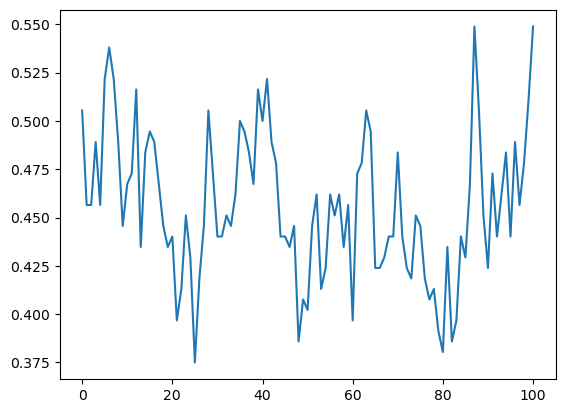

In [6]:
plt.plot(df_rho.loc[419].rho[0:])

df_rho.loc[418].rho[:10] * 94933, 94933*0.65, 94933*0.92

# Read real data

In [4]:
realnet_path = Path('../../../triad-statistics/results_realnet2.h5')
results_realnet = pd.read_hdf(realnet_path)
results_realnet

# wikielections

,wiki elections,slashdot,epinions,sampson,bitcoin-alpha,bitcoin-otc,Congress mentions
tr0,0.012461,1.236096e-02,7.488967e-03,0.108808,0.003380,0.004742,0.000000
tr1,0.027505,5.186732e-02,2.700950e-02,0.135579,0.010715,0.031147,0.128114
tr2,0.010724,1.451844e-02,4.778784e-03,0.128670,0.006197,0.011741,0.103203
tr3,0.072158,2.477065e-02,1.890176e-02,0.107945,0.043627,0.037097,0.021352
tr4,0.049625,2.027677e-02,2.477050e-02,0.194301,0.028078,0.034881,0.092527
tr5,0.065085,2.038621e-02,1.184566e-02,0.083765,0.032912,0.029805,0.010676
tr6,0.077725,2.977175e-02,2.997776e-02,0.081174,0.034196,0.030845,0.003559
tr7,0.684716,8.260479e-01,8.752271e-01,0.159758,0.840896,0.819742,0.640569
T,745129.000000,1.251925e+06,1.096199e+07,1158.000000,88753.000000,125886.000000,281.000000
L_plus,75446.000000,2.213970e+05,5.830880e+05,97.000000,15739.000000,22098.000000,0.000000


In [5]:
results_realnet.loc["tr0"]

wiki elections       0.012461
slashdot             0.012361
epinions             0.007489
sampson              0.108808
bitcoin-alpha        0.003380
bitcoin-otc          0.004742
Congress mentions    0.000000
Name: tr0, dtype: float64

In [6]:
results_realnet['wiki elections']

tr0            0.012461
tr1            0.027505
tr2            0.010724
tr3            0.072158
tr4            0.049625
tr5            0.065085
tr6            0.077725
tr7            0.684716
T         745129.000000
L_plus     75446.000000
L          94933.000000
rho            0.794729
Tr0         9285.000000
Tr1        20495.000000
Tr2         7991.000000
Tr3        53767.000000
Tr4        36977.000000
Tr5        48497.000000
Tr6        57915.000000
Tr7       510202.000000
Name: wiki elections, dtype: float64

In [7]:
pd.DataFrame(results_realnet['wiki elections']).transpose()

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
wiki elections,0.012461,0.027505,0.010724,0.072158,0.049625,0.065085,0.077725,0.684716,745129.0,75446.0,94933.0,0.794729,9285.0,20495.0,7991.0,53767.0,36977.0,48497.0,57915.0,510202.0


In [8]:
# epinions = pd.DataFrame()

# d = {}

# for i in range(8):
#     lab = "tr" + str(i)
#     d[lab] = results_realnet.loc[lab].epinions
#     # print(results_realnet.loc[lab].epinions)

# epinions = epinions.append(d, ignore_index=True)
# # epinions.rho = 0.794
# epinions = epinions.assign(rho=0.0)
# epinions

# epinions = pd.DataFrame(results_realnet['epinions']).transpose()
# epinions

In [9]:
sampson = pd.DataFrame(results_realnet['sampson']).transpose()
sampson

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
sampson,0.108808,0.135579,0.12867,0.107945,0.194301,0.083765,0.081174,0.159758,1158.0,97.0,184.0,0.527174,126.0,157.0,149.0,125.0,225.0,97.0,94.0,185.0


# Error functions

That are used in finding parameters closest to real network stats. 

In [10]:

n2_triads = ["tr1", "tr2", "tr4"]
n1_triads = ["tr3", "tr5", "tr6"]
deg_triads = [*n1_triads, *n2_triads]
all_triads = ["tr" + str(i) for i in range(8)]

# def normalize(data):
#     triads = ["tr" + str(i) for i in range(8)]
#     if data.shape[0] > 1:
#         if data.shape[1] > 1:
#             return data[triads].values.transpose() / np.sum(data[triads], axis=1).values
#     return ValueError("Not implemented")

def transform_data(data, triads = None, triads_groups = None):
    if triads_groups is None:
        T = len(triads)
        if data.shape[0] > 1:
            if data.shape[1] > 1:
                return data[triads].values.transpose() / np.sum(data[triads], axis=1).values - 1/T
            else:
                return data[triads] / np.sum(data[triads]) - 1/T
        else:
            return data[triads] / np.sum(data[triads], axis=1).values[0] - 1/T
    else:
        if type(data) == pd.DataFrame:
            df = data.copy(deep=True)
            for triads in triads_groups:
                nn = transform_data(data, triads)
                
                if np.where(np.array(nn.shape) == 3)[0][0] == 0:
                    nn = nn.transpose()

                new_df = pd.DataFrame(nn, index = data.index, columns=triads)
                df.update(new_df)
            df = df.drop(columns=['tr0', 'tr7'])
            return df
        else:
            ValueError("Not implemented")

def closest_to_six_triads(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[deg_triads].transpose() - original_data[deg_triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[deg_triads].subtract(original_data[deg_triads].values)**2).sum(axis=1, min_count=1)
            return err
    
    if any(np.isnan(original_data[deg_triads])):
        return np.nan
    
    err = 0
    for triad in deg_triads:
        err += (original_data[triad] - model_data[triad])**2
    return err

def closest_to_six_triads_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_six_triads(original_data, model_data)
    
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            raise ValueError("Not implemented")
        elif type(model_data) == pd.DataFrame:
            original_data_trans = transform_data(original_data, triads_groups=(n1_triads, n2_triads))
            model_data_trans = transform_data(model_data, triads_groups=(n1_triads, n2_triads))
    
            return closest_to_six_triads(original_data_trans, model_data_trans)
    
    # model    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    # p1_m = pd.DataFrame(p1_m.transpose(), columns = n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    # p2_m = pd.DataFrame(p2_m.transpose(), columns = n1_triads)
    
    
    err = np.sum((p1_r - p1_m)**2, axis = 1).values[0]
    err += np.sum((p2_r - p2_m)**2, axis = 1).values[0]
    
    return err

def closest_to_four_triads(original_data, model_data):
    triads = ["tr1", "tr2", "tr5", "tr6"]
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[triads].transpose() - original_data[triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[triads].subtract(original_data[triads].values)**2).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = np.sum((original_data[triads] - model_data[triads])**2, axis = 1).values[0]
    return err

def closest_to_four_triads_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_four_triads(original_data, model_data)
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            raise ValueError("Not implemented")
        elif type(model_data) == pd.DataFrame:
            original_data_trans = transform_data(original_data, triads_groups=(n1_triads, n2_triads))
            model_data_trans = transform_data(model_data, triads_groups=(n1_triads, n2_triads))
    
            return closest_to_four_triads(original_data_trans, model_data_trans)
    
    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    triads2 = ["tr1", "tr2"]
    triads1 = ["tr5", "tr6"]
    
    err = np.sum((p1_r[triads1] - p1_m[triads1])**2, axis = 1).values[0]
    err += np.sum((p2_r[triads2] - p2_m[triads2])**2, axis = 1).values[0]
    
    return err

def closest_to_high_underrepresentation(original_data, model_data):
    triads = ["tr2"]
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[triads].transpose() - original_data[triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[triads].subtract(original_data[triads].values)**2).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = 0
    err += (original_data["tr2"] - model_data["tr2"])**2
    return err

def closest_to_high_underrepresentation_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_high_underrepresentation(original_data, model_data)
    
    # p1_r = transform_data(original_data, n1_triads)
    # p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    if any(np.isnan(p2_r[["tr2"]])):
        return np.nan
    
    err = 0
    err += np.sum((p2_r["tr2"] - p2_m["tr2"])**2)
    return err

def closest_to_rho(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == pd.DataFrame:
            err = model_data["rho"].subtract(original_data["rho"].values[0])**2
            return err
    
    err = 0
    err += (original_data["rho"] - model_data["rho"])**2
    return err

"""New error functions"""

"""Assuming we must have proper sign of deviations. """

def closest_to_six_triads_corrdevs_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        
        err = closest_to_four_triads(original_data, model_data)
        err += np.sum(model_data[deg_triads] * (original_data[deg_triads].values)  > 0, axis = 1) != 6
        return err
    
    raise ValueError("Not implemented")

    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    err = np.sum((p1_r - p1_m)**2, axis = 1).values[0]
    err += np.sum((p2_r - p2_m)**2, axis = 1).values[0]
    
    return err

def closest_to_four_triads_corrdevs_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        triads = ["tr1", "tr2", "tr5", "tr6"]
        err = closest_to_four_triads(original_data, model_data)
        err += np.sum(model_data[triads] * (original_data[triads].values)  > 0, axis = 1) != 4
        return err
    
    raise ValueError("Not implemented")
    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    triads2 = ["tr1", "tr2"]
    triads1 = ["tr5", "tr6"]
    
    err = np.sum((p1_r[triads1] - p1_m[triads1])**2, axis = 1).values[0]
    err += np.sum((p2_r[triads2] - p2_m[triads2])**2, axis = 1).values[0]
    
    return err


"""Combination of triad densities and rho"""

def closest_to_six_triads_rho(original_data, model_data, rho_factor = 5):
    return closest_to_six_triads(original_data, model_data) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_six_triads_rho_transformed(original_data, model_data, is_data_transformed = False, rho_factor = 5):
    return closest_to_six_triads_transformed(original_data, model_data, is_data_transformed) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_four_triads_rho(original_data, model_data, rho_factor = 5):
    return closest_to_four_triads(original_data, model_data) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_four_triads_rho_transformed(original_data, model_data, is_data_transformed = False, rho_factor = 5):
    return closest_to_four_triads_transformed(original_data, model_data, is_data_transformed) + closest_to_rho(original_data, model_data) * rho_factor

"""Not MSE, but relative error. In this way differences for different triads will weight the same. """
def closest_to_six_triads_relative(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum(ap.abs((model_data[deg_triads].transpose() - original_data[deg_triads].values)/ original_data[deg_triads].values), axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            # err = np.sum(np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values), axis=1)
            err = (np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values)).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[deg_triads])):
        return np.nan
    
    err = 0
    for triad in deg_triads:
        err += (np.abs((original_data[triad] - model_data[triad]) / original_data[triad])).values[0]
    return err

"""Not MSE, but relative error. In this way differences for different triads will weight the same. """
def closest_to_four_triads_relative(original_data, model_data):
    triads = ["tr1", "tr2", "tr5", "tr6"]

    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum(np.abs((model_data[triads].transpose() - original_data[triads].values)/ original_data[triads].values), axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            # err = np.sum(np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values), axis=1)
            err = (np.abs(model_data[triads].subtract(original_data[triads].values) / original_data[triads].values)).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = 0
    for triad in triads:
        err += (np.abs((original_data[triad] - model_data[triad]) / original_data[triad])).values[0]
    return err

error_functions = [closest_to_rho, closest_to_high_underrepresentation, closest_to_high_underrepresentation_transformed, 
                   closest_to_four_triads, closest_to_four_triads_transformed, closest_to_six_triads, closest_to_six_triads_transformed]
error_functions.extend([closest_to_six_triads_corrdevs_transformed, closest_to_four_triads_corrdevs_transformed, 
                        closest_to_six_triads_rho, closest_to_six_triads_rho_transformed, closest_to_four_triads_rho, closest_to_four_triads_rho_transformed,
                        closest_to_six_triads_relative, closest_to_four_triads_relative])

# error_functions = [closest_to_rho, closest_to_high_underrepresentation, closest_to_high_underrepresentation_transformed, 
#                    closest_to_four_triads, closest_to_four_triads_transformed, closest_to_six_triads, closest_to_six_triads_transformed]

In [11]:
sampson_trans = transform_data(sampson, triads_groups=(n1_triads, n2_triads))

df_rho_trans = transform_data(df_rho, triads_groups = (n1_triads, n2_triads))

# datasets = []
# for error_fun in error_functions:
#     if error_fun.__name__.endswith("_transformed"):
#         datasets.append((wiki_trans, df_w1000_trans, True, 2))
#     else:
#         datasets.append((wiki, df_w1000))


NameError: name 'df_rho' is not defined

# Finding simulations closest to real-world data results

In [12]:
n1_triads = ['tr3', 'tr5', 'tr6']
n1_nohierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


## Finding quasi-stationary level

In [21]:
fpath = outputs_sam_rhoinits.joinpath("df2_rho.h5")
df2_rho = pd.read_hdf(fpath, key = "df2_rho")
len(df2_rho)

55382

In [22]:
fpath = outputs_sam_rhoinits.joinpath("df2_rho_extended.h5")
df2_rho_extended = pd.read_hdf(fpath, key = "df2_rho")
len(df2_rho_extended)

120248

In [23]:
df2_rho = pd.concat([df2_rho, df2_rho_extended])
df2_rho.reset_index(drop = True, inplace = True)
df2_rho.drop(columns = ["index"], inplace = True)
print(len(df2_rho))
df2_rho.head(5)

175630


,q,p,ps,rho_init,steps,rho_qs_m,rho_qs_s,rho_qs_b,rho_qs_f,rho_qs2_m,...,tr6_qs3_b,tr6_qs3_f,tr7_qs_m,tr7_qs_s,tr7_qs_b,tr7_qs_f,tr7_qs3_m,tr7_qs3_s,tr7_qs3_b,tr7_qs3_f
0,0.2,0.45,0.95,0.9,100,0.528986,0.029428,50.0,101.0,0.535857,...,50.0,101.0,0.156304,0.031097,50.0,101.0,0.156304,0.031097,50.0,101.0
1,0.2,0.45,0.95,0.9,100,0.542500,0.041157,50.0,100.0,0.540217,...,50.0,101.0,0.175692,0.041838,50.0,101.0,0.175692,0.041838,50.0,101.0
2,0.2,0.45,0.95,0.9,100,0.519075,0.046769,50.0,101.0,0.535578,...,50.0,101.0,0.156744,0.046404,50.0,101.0,0.156744,0.046404,50.0,101.0
3,0.2,0.45,0.95,0.9,100,0.542369,0.044910,51.0,100.0,0.549044,...,50.0,101.0,0.169689,0.048911,51.0,101.0,0.174539,0.050808,58.0,101.0
4,0.2,0.45,0.95,0.9,100,0.537084,0.041734,50.0,101.0,0.530174,...,67.0,101.0,0.164178,0.044993,50.0,101.0,0.167777,0.047878,59.0,101.0


In [26]:
chosen_cols = ['q', 'p', 'ps', 'rho_qs_m',
       'rho_qs_s', 'rho_qs_b', 'rho_qs_f', 'rho_qs2_m', 'rho_qs2_s',
       'rho_qs2_b', 'rho_qs2_f']

df2_rho[['q', 'p', 'ps', 'rho_qs_m',
       'rho_qs_s', 'rho_qs_b', 'rho_qs_f', 'rho_qs3_m', 'rho_qs3_s',
       'rho_qs3_b', 'rho_qs3_f']]

,q,p,ps,rho_qs_m,rho_qs_s,rho_qs_b,rho_qs_f,rho_qs3_m,rho_qs3_s,rho_qs3_b,rho_qs3_f
0,0.20,0.45,0.95,0.528986,0.029428,50.0,101.0,0.528986,0.029428,50.0,101.0
1,0.20,0.45,0.95,0.542500,0.041157,50.0,100.0,0.541667,0.041175,50.0,101.0
2,0.20,0.45,0.95,0.519075,0.046769,50.0,101.0,0.519075,0.046769,50.0,101.0
3,0.20,0.45,0.95,0.542369,0.044910,51.0,100.0,0.541413,0.044960,51.0,101.0
4,0.20,0.45,0.95,0.537084,0.041734,50.0,101.0,0.538043,0.042302,53.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...
55377,0.25,0.30,0.75,0.459565,0.034530,50.0,100.0,0.454209,0.029014,54.0,101.0
55378,0.25,0.30,0.75,0.460038,0.035169,50.0,101.0,0.460038,0.035169,50.0,101.0
55379,0.25,0.30,0.75,0.459506,0.035391,50.0,101.0,0.459506,0.035391,50.0,101.0
55380,0.25,0.30,0.75,0.450000,0.027498,51.0,101.0,0.445035,0.023809,57.0,101.0


In [25]:
try:
    inds = [row.cur_steps[-1] == row.steps for ind,row in df2_rho.iterrows()]

    df2_rho_correct = df2_rho.iloc[inds]
except AttributeError:
    df2_rho_correct = df2_rho
    print("There was an error, but if while creating the df2_rho dataframes `leave_correct` was `True`, then there should not be a problem.")

There was an error, but if while creating the df2_rho dataframes `leave_correct` was `True`, then there should not be a problem.


In [26]:
df2_rho_correct_g = group_quasilevels(df2_rho_correct, cols = ['q', 'p', 'ps', 'rho_init'])
df2_rho_correct_g

/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/Desktop/programming/toolbox/complex-system-toolbox/experiments/phase_transit

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.2 0.5 0.8  0.0  0.2  0.5       0.8            1  0.397935          0.0   
            0.9  0.0  0.2  0.5       0.9            1  0.399723          0.0   
    0.3 0.5 0.0  0.0  0.3  0.5       0.0            1  0.424024          0.0   
            0.1  0.0  0.3  0.5       0.1            1  0.427845          0.0   
            0.2  0.0  0.3  0.5       0.2            1  0.419864          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 0.9 0.0  1.0  0.5  0.9       0.0            1       NaN          NaN   
            0.1  1.0  0.5  0.9       0.1            1       NaN          NaN   
            0.9  1.0  0.5  0.9       0.9            1       NaN          NaN   
        1.0 0.0  1.0  0.5  1.0       0.0            1       NaN          NaN   
            0.1  1.0  0.5  1.0       0.1            1       NaN          NaN   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  tr3_lvl3  \
0.0 0.2 0.5 0.8              1  0.400801           0.0  ...  0.093180   
            0.9              1  0.408048           0.0  ...  0.092604   
    0.3 0.5 0.0              1  0.414658           0.0  ...  0.095618   
            0.1              1  0.422837           0.0  ...  0.101172   
            0.2              1  0.416433           0.0  ...  0.097514   
...                        ...       ...           ...  ...       ...   
1.0 0.5 0.9 0.0              0       NaN           NaN  ...       NaN   
            0.1              0       NaN           NaN  ...  0.081174   
            0.9              0       NaN           NaN  ...       NaN   
        1.0 0.0              0       NaN           NaN  ...       NaN   
            0.1              0       NaN           NaN  ...  0.058722   

                 tr3_lvl3_std  tr4_lvl3  tr4_lvl3_std  tr5_lvl3  tr5_lvl3_std  \
0.0 0.2 0.5 0.8           0.0  0.154628           0.0  0.090420           0.0   
            0.9           0.0  0.151461           0.0  0.092976           0.0   
    0.3 0.5 0.0           0.0  0.152697           0.0  0.097582           0.0   
            0.1           0.0  0.149429           0.0  0.100427           0.0   
            0.2           0.0  0.148201           0.0  0.096075           0.0   
...                       ...       ...           ...       ...           ...   
1.0 0.5 0.9 0.0           NaN       NaN           NaN       NaN           NaN   
            0.1           0.0  0.081174           0.0       NaN           NaN   
            0.9           NaN       NaN           NaN       NaN           NaN   
        1.0 0.0           NaN       NaN           NaN       NaN           NaN   
            0.1           0.0  0.044905           0.0       NaN           NaN   

                 tr6_lvl3  tr6_lvl3_std  tr7_lvl3  tr7_lvl3_std  
0.0 0.2 0.5 0.8  0.088252           0.0  0.062193           0.0  
            0.9  0.092011           0.0  0.065139           0.0  
    0.3 0.5 0.0  0.097311           0.0  0.077500           0.0  
            0.1  0.096820           0.0  0.080074           0.0  
            0.2  0.093891           0.0  0.072979           0.0  
...                   ...           ...       ...           ...  
1.0 0.5 0.9 0.0       NaN           NaN       NaN           NaN  
            0.1  0.254750           0.0  0.138169           0.0  
            0.9       NaN           NaN       NaN           NaN  
        1.0 0.0       NaN           NaN       NaN           NaN  
            0.1  0.238342           0.0  0.350604           0.0  

[23560 rows x 48 columns]

In [47]:
np.unique(df2_rho_correct_g.repetitions)
df2_rho_correct_g

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.2 0.5 0.8  0.0  0.2  0.5       0.8            1  0.397935          0.0   
            0.9  0.0  0.2  0.5       0.9            1  0.399723          0.0   
    0.3 0.5 0.0  0.0  0.3  0.5       0.0            1  0.424024          0.0   
            0.1  0.0  0.3  0.5       0.1            1  0.427845          0.0   
            0.2  0.0  0.3  0.5       0.2            1  0.419864          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 0.9 0.0  1.0  0.5  0.9       0.0            1       NaN          NaN   
            0.1  1.0  0.5  0.9       0.1            1       NaN          NaN   
            0.9  1.0  0.5  0.9       0.9            1       NaN          NaN   
        1.0 0.0  1.0  0.5  1.0       0.0            1       NaN          NaN   
            0.1  1.0  0.5  1.0       0.1            1       NaN          NaN   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  tr3_lvl3  \
0.0 0.2 0.5 0.8              1  0.400801           0.0  ...  0.093180   
            0.9              1  0.408048           0.0  ...  0.092604   
    0.3 0.5 0.0              1  0.414658           0.0  ...  0.095618   
            0.1              1  0.422837           0.0  ...  0.101172   
            0.2              1  0.416433           0.0  ...  0.097514   
...                        ...       ...           ...  ...       ...   
1.0 0.5 0.9 0.0              0       NaN           NaN  ...       NaN   
            0.1              0       NaN           NaN  ...  0.081174   
            0.9              0       NaN           NaN  ...       NaN   
        1.0 0.0              0       NaN           NaN  ...       NaN   
            0.1              0       NaN           NaN  ...  0.058722   

                 tr3_lvl3_std  tr4_lvl3  tr4_lvl3_std  tr5_lvl3  tr5_lvl3_std  \
0.0 0.2 0.5 0.8           0.0  0.154628           0.0  0.090420           0.0   
            0.9           0.0  0.151461           0.0  0.092976           0.0   
    0.3 0.5 0.0           0.0  0.152697           0.0  0.097582           0.0   
            0.1           0.0  0.149429           0.0  0.100427           0.0   
            0.2           0.0  0.148201           0.0  0.096075           0.0   
...                       ...       ...           ...       ...           ...   
1.0 0.5 0.9 0.0           NaN       NaN           NaN       NaN           NaN   
            0.1           0.0  0.081174           0.0       NaN           NaN   
            0.9           NaN       NaN           NaN       NaN           NaN   
        1.0 0.0           NaN       NaN           NaN       NaN           NaN   
            0.1           0.0  0.044905           0.0       NaN           NaN   

                 tr6_lvl3  tr6_lvl3_std  tr7_lvl3  tr7_lvl3_std  
0.0 0.2 0.5 0.8  0.088252           0.0  0.062193           0.0  
            0.9  0.092011           0.0  0.065139           0.0  
    0.3 0.5 0.0  0.097311           0.0  0.077500           0.0  
            0.1  0.096820           0.0  0.080074           0.0  
            0.2  0.093891           0.0  0.072979           0.0  
...                   ...           ...       ...           ...  
1.0 0.5 0.9 0.0       NaN           NaN       NaN           NaN  
            0.1  0.254750           0.0  0.138169           0.0  
            0.9       NaN           NaN       NaN           NaN  
        1.0 0.0       NaN           NaN       NaN           NaN  
            0.1  0.238342           0.0  0.350604           0.0  

[23560 rows x 48 columns]

In [27]:
len(df2_rho_correct.index)

175630

In [45]:
inds = np.isnan(df2_rho_correct_g.rho_lvl3)
df2_rho_correct_g.loc[inds]
# inds

q     p    ps  rho_init  repetitions  rho_lvl  \
0.2 0.70 0.85 0.9  0.2  0.70  0.85       0.9            3      NaN   
         0.90 0.9  0.2  0.70  0.90       0.9            2      NaN   
         1.00 0.9  0.2  0.70  1.00       0.9            1      NaN   
    0.75 0.20 0.9  0.2  0.75  0.20       0.9            1      NaN   
         0.35 0.9  0.2  0.75  0.35       0.9            1      NaN   
         0.40 0.9  0.2  0.75  0.40       0.9            3      NaN   
         0.50 0.9  0.2  0.75  0.50       0.9            2      NaN   
         0.65 0.8  0.2  0.75  0.65       0.8            2      NaN   
              0.9  0.2  0.75  0.65       0.9            1      NaN   
         0.80 0.9  0.2  0.75  0.80       0.9            1      NaN   

                   rho_lvl_std  rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.2 0.70 0.85 0.9          NaN              0       NaN           NaN  ...   
         0.90 0.9          NaN              0       NaN           NaN  ...   
         1.00 0.9          NaN              0       NaN           NaN  ...   
    0.75 0.20 0.9          NaN              0       NaN           NaN  ...   
         0.35 0.9          NaN              0       NaN           NaN  ...   
         0.40 0.9          NaN              0       NaN           NaN  ...   
         0.50 0.9          NaN              0       NaN           NaN  ...   
         0.65 0.8          NaN              0       NaN           NaN  ...   
              0.9          NaN              0       NaN           NaN  ...   
         0.80 0.9          NaN              0       NaN           NaN  ...   

                   tr3_lvl3  tr3_lvl3_std  tr4_lvl3  tr4_lvl3_std  tr5_lvl3  \
0.2 0.70 0.85 0.9       NaN           NaN       NaN           NaN       NaN   
         0.90 0.9       NaN           NaN       NaN           NaN       NaN   
         1.00 0.9       NaN           NaN       NaN           NaN       NaN   
    0.75 0.20 0.9       NaN           NaN       NaN           NaN       NaN   
         0.35 0.9       NaN           NaN       NaN           NaN       NaN   
         0.40 0.9       NaN           NaN       NaN           NaN       NaN   
         0.50 0.9       NaN           NaN       NaN           NaN       NaN   
         0.65 0.8       NaN           NaN       NaN           NaN       NaN   
              0.9       NaN           NaN       NaN           NaN       NaN   
         0.80 0.9       NaN           NaN       NaN           NaN       NaN   

                   tr5_lvl3_std  tr6_lvl3  tr6_lvl3_std  tr7_lvl3  \
0.2 0.70 0.85 0.9           NaN       NaN           NaN       NaN   
         0.90 0.9           NaN       NaN           NaN       NaN   
         1.00 0.9           NaN       NaN           NaN       NaN   
    0.75 0.20 0.9           NaN       NaN           NaN       NaN   
         0.35 0.9           NaN       NaN           NaN       NaN   
         0.40 0.9           NaN       NaN           NaN       NaN   
         0.50 0.9           NaN       NaN           NaN       NaN   
         0.65 0.8           NaN       NaN           NaN       NaN   
              0.9           NaN       NaN           NaN       NaN   
         0.80 0.9           NaN       NaN           NaN       NaN   

                   tr7_lvl3_std  
0.2 0.70 0.85 0.9           NaN  
         0.90 0.9           NaN  
         1.00 0.9           NaN  
    0.75 0.20 0.9           NaN  
         0.35 0.9           NaN  
         0.40 0.9           NaN  
         0.50 0.9           NaN  
         0.65 0.8           NaN  
              0.9           NaN  
         0.80 0.9           NaN  

[10 rows x 48 columns]

In [46]:
q = 0.2
inds = np.isnan(df2_rho_correct_g.rho_lvl3) & (np.abs(df2_rho_correct_g.q - q) < 1e-5)
df2_rho_correct_g.loc[inds]

q    p    ps  rho_init  repetitions  rho_lvl  rho_lvl_std  \
0.2 0.7 0.55 0.9  0.2  0.7  0.55       0.9            1      NaN          NaN   
        0.60 0.9  0.2  0.7  0.60       0.9            2      NaN          NaN   
        0.75 0.8  0.2  0.7  0.75       0.8            1      NaN          NaN   
             0.9  0.2  0.7  0.75       0.9            2      NaN          NaN   
        0.85 0.9  0.2  0.7  0.85       0.9            3      NaN          NaN   
...               ...  ...   ...       ...          ...      ...          ...   
    1.0 0.90 0.9  0.2  1.0  0.90       0.9            3      NaN          NaN   
        0.95 0.8  0.2  1.0  0.95       0.8            1      NaN          NaN   
             0.9  0.2  1.0  0.95       0.9            2      NaN          NaN   
        1.00 0.8  0.2  1.0  1.00       0.8            1      NaN          NaN   
             0.9  0.2  1.0  1.00       0.9            2      NaN          NaN   

                  rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  tr3_lvl3  \
0.2 0.7 0.55 0.9              0       NaN           NaN  ...       NaN   
        0.60 0.9              0       NaN           NaN  ...       NaN   
        0.75 0.8              0       NaN           NaN  ...       NaN   
             0.9              0       NaN           NaN  ...       NaN   
        0.85 0.9              0       NaN           NaN  ...       NaN   
...                         ...       ...           ...  ...       ...   
    1.0 0.90 0.9              0       NaN           NaN  ...       NaN   
        0.95 0.8              0       NaN           NaN  ...       NaN   
             0.9              0       NaN           NaN  ...       NaN   
        1.00 0.8              0       NaN           NaN  ...       NaN   
             0.9              0       NaN           NaN  ...       NaN   

                  tr3_lvl3_std  tr4_lvl3  tr4_lvl3_std  tr5_lvl3  \
0.2 0.7 0.55 0.9           NaN       NaN           NaN       NaN   
        0.60 0.9           NaN       NaN           NaN       NaN   
        0.75 0.8           NaN       NaN           NaN       NaN   
             0.9           NaN       NaN           NaN       NaN   
        0.85 0.9           NaN       NaN           NaN       NaN   
...                        ...       ...           ...       ...   
    1.0 0.90 0.9           NaN       NaN           NaN       NaN   
        0.95 0.8           NaN       NaN           NaN       NaN   
             0.9           NaN       NaN           NaN       NaN   
        1.00 0.8           NaN       NaN           NaN       NaN   
             0.9           NaN       NaN           NaN       NaN   

                  tr5_lvl3_std  tr6_lvl3  tr6_lvl3_std  tr7_lvl3  tr7_lvl3_std  
0.2 0.7 0.55 0.9           NaN       NaN           NaN       NaN           NaN  
        0.60 0.9           NaN       NaN           NaN       NaN           NaN  
        0.75 0.8           NaN       NaN           NaN       NaN           NaN  
             0.9           NaN       NaN           NaN       NaN           NaN  
        0.85 0.9           NaN       NaN           NaN       NaN           NaN  
...                        ...       ...           ...       ...           ...  
    1.0 0.90 0.9           NaN       NaN           NaN       NaN           NaN  
        0.95 0.8           NaN       NaN           NaN       NaN           NaN  
             0.9           NaN       NaN           NaN       NaN           NaN  
        1.00 0.8           NaN       NaN           NaN       NaN           NaN  
             0.9           NaN       NaN           NaN       NaN           NaN  

[130 rows x 48 columns]

In [37]:
q = 0.9
p = 0.3
ps = 0.5
rho_init = 0.8

ind_t = np.where( (np.abs(df2_rho_correct.q - q) < 1e-5) & (np.abs(df2_rho_correct.p - p ) < 1e-5) & (np.abs(df2_rho_correct.rho_init - rho_init) < 1e-5) & (np.abs(df2_rho_correct.ps - ps) < 1e-5))[0]


# df_one = df102.iloc[0].rho
df_one = df2_rho_correct.iloc[ind_t[0]].rho
# q = df_w1000.iloc[108].q
# p = df_w1000.iloc[108].p
# ps = df_w1000.iloc[108].ps
df_one
plt.plot(df_one[0:])
plt.title('q, psbt, pst = ' + str(q) + ', ' + str(p) + ', ' + str(ps))

AttributeError: 'Series' object has no attribute 'rho'

Text(0.5, 1.0, 'q, psbt, pst = 0.9, 0.0, 0.8')

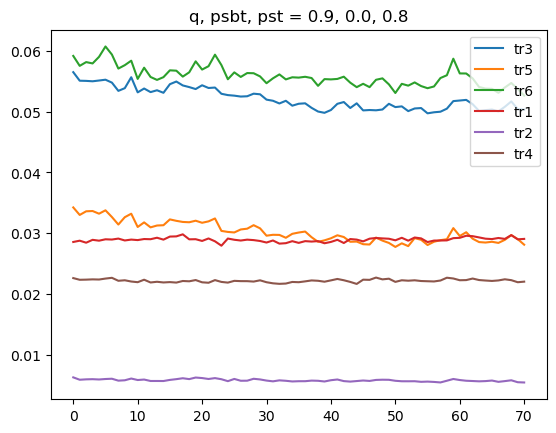

In [40]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in deg_triads:
    plt.plot(df2_rho_correct.iloc[ind_t[0]][triad][30:])
    
plt.legend(deg_triads)
# plt.xscale('log')

plt.title('q, psbt, pst = ' + str(q) + ', ' + str(p) + ', ' + str(ps))

## Applying error functions to QS results

In [48]:
"""Adjusting col names"""

for col in df2_rho_correct_g.columns:
    if col.endswith("_lvl3"):
        new_col = col.split("_lvl3")[0]
        df2_rho_correct_g[new_col] = df2_rho_correct_g[col]


In [50]:
df2_rho_correct_g[["rho_lvl", "rho_lvl2", "rho_lvl3", "rho"]]

rho_lvl  rho_lvl2  rho_lvl3       rho
0.0 0.2 0.5 0.8  0.397935  0.400801  0.397059  0.397059
            0.9  0.399723  0.408048  0.399723  0.399723
    0.3 0.5 0.0  0.424024  0.414658  0.422101  0.422101
            0.1  0.427845  0.422837  0.430200  0.430200
            0.2  0.419864  0.416433  0.419864  0.419864
...                   ...       ...       ...       ...
1.0 0.5 0.9 0.0       NaN       NaN       NaN       NaN
            0.1       NaN       NaN  0.451087  0.451087
            0.9       NaN       NaN       NaN       NaN
        1.0 0.0       NaN       NaN       NaN       NaN
            0.1       NaN       NaN  0.608696  0.608696

[23560 rows x 4 columns]

In [51]:
df2_rho_correct_g_trans = transform_data(df2_rho_correct_g, triads_groups = (n1_triads, n2_triads))
df2_rho_correct_g_trans

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.2 0.5 0.8  0.0  0.2  0.5       0.8            1  0.397935          0.0   
            0.9  0.0  0.2  0.5       0.9            1  0.399723          0.0   
    0.3 0.5 0.0  0.0  0.3  0.5       0.0            1  0.424024          0.0   
            0.1  0.0  0.3  0.5       0.1            1  0.427845          0.0   
            0.2  0.0  0.3  0.5       0.2            1  0.419864          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 0.9 0.0  1.0  0.5  0.9       0.0            1       NaN          NaN   
            0.1  1.0  0.5  0.9       0.1            1       NaN          NaN   
            0.9  1.0  0.5  0.9       0.9            1       NaN          NaN   
        1.0 0.0  1.0  0.5  1.0       0.0            1       NaN          NaN   
            0.1  1.0  0.5  1.0       0.1            1       NaN          NaN   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  tr6_lvl3_std  \
0.0 0.2 0.5 0.8              1  0.400801           0.0  ...           0.0   
            0.9              1  0.408048           0.0  ...           0.0   
    0.3 0.5 0.0              1  0.414658           0.0  ...           0.0   
            0.1              1  0.422837           0.0  ...           0.0   
            0.2              1  0.416433           0.0  ...           0.0   
...                        ...       ...           ...  ...           ...   
1.0 0.5 0.9 0.0              0       NaN           NaN  ...           NaN   
            0.1              0       NaN           NaN  ...           0.0   
            0.9              0       NaN           NaN  ...           NaN   
        1.0 0.0              0       NaN           NaN  ...           NaN   
            0.1              0       NaN           NaN  ...           0.0   

                 tr7_lvl3  tr7_lvl3_std       rho       tr1       tr2  \
0.0 0.2 0.5 0.8  0.062193           0.0  0.397059  0.010573 -0.002986   
            0.9  0.065139           0.0  0.399723  0.005331  0.001388   
    0.3 0.5 0.0  0.077500           0.0  0.422101 -0.008345  0.007462   
            0.1  0.080074           0.0  0.430200 -0.001152  0.002868   
            0.2  0.072979           0.0  0.419864  0.005525  0.000704   
...                   ...           ...       ...       ...       ...   
1.0 0.5 0.9 0.0       NaN           NaN       NaN       NaN       NaN   
            0.1  0.138169           0.0  0.451087  0.398095       NaN   
            0.9       NaN           NaN       NaN       NaN       NaN   
        1.0 0.0       NaN           NaN       NaN       NaN       NaN   
            0.1  0.350604           0.0  0.608696  0.486111       NaN   

                      tr3       tr4       tr5       tr6  
0.0 0.2 0.5 0.8  0.009426 -0.007587 -0.000727 -0.008699  
            0.9  0.000264 -0.006719  0.001606 -0.001871  
    0.3 0.5 0.0 -0.004197  0.000883  0.002565  0.001632  
            0.1  0.005693 -0.001716  0.003196 -0.008889  
            0.2  0.005870 -0.006230  0.000864 -0.006734  
...                   ...       ...       ...       ...  
1.0 0.5 0.9 0.0       NaN       NaN       NaN       NaN  
            0.1 -0.091688 -0.064762       NaN  0.425021  
            0.9       NaN       NaN       NaN       NaN  
        1.0 0.0       NaN       NaN       NaN       NaN  
            0.1 -0.135659 -0.152778       NaN  0.468992  

[23560 rows x 55 columns]

In [52]:
# wiki_trans = transform_data(wiki, triads_groups=(n1_triads, n2_triads))

# df_w1000_trans = transform_data(df_w1000, triads_groups = (n1_triads, n2_triads))

datasets = []
for error_fun in error_functions:
    if error_fun.__name__.endswith("_transformed"):
        datasets.append((sampson_trans, df2_rho_correct_g_trans, True, 2))
    else:
        datasets.append((sampson, df2_rho_correct_g))


In [53]:
closest_to_four_triads_transformed(sampson_trans, df2_rho_correct_g_trans, True)

0.0  0.2  0.5  0.8    0.006197
               0.9    0.006716
     0.3  0.5  0.0    0.006726
               0.1    0.006026
               0.2    0.006311
                        ...   
1.0  0.5  0.9  0.0         NaN
               0.1    0.402303
               0.9         NaN
          1.0  0.0         NaN
               0.1    0.529222
Length: 23560, dtype: float64

In [54]:

errs = {error_fun.__name__: np.zeros(len(df2_rho_correct_g)) for error_fun in error_functions}

for ind, (dataset, error_fun) in enumerate(zip(datasets, error_functions)):
    # original_data, model_data, is_trans = dataset
    # if is_trans:
    # errs[error_fun.__name__] = error_fun(original_data, model_data)
    # print(ind)
    try:
        errs[error_fun.__name__] = error_fun(*dataset)
    except TypeError:
        errs[error_fun.__name__] = error_fun(*dataset[:3])
    
    # if len(dataset) > 2:
        

for error_fun in error_functions:
    df2_rho_correct_g[error_fun.__name__] = errs[error_fun.__name__]

df2_rho_correct_g

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.2 0.5 0.8  0.0  0.2  0.5       0.8            1  0.397935          0.0   
            0.9  0.0  0.2  0.5       0.9            1  0.399723          0.0   
    0.3 0.5 0.0  0.0  0.3  0.5       0.0            1  0.424024          0.0   
            0.1  0.0  0.3  0.5       0.1            1  0.427845          0.0   
            0.2  0.0  0.3  0.5       0.2            1  0.419864          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 0.9 0.0  1.0  0.5  0.9       0.0            1       NaN          NaN   
            0.1  1.0  0.5  0.9       0.1            1       NaN          NaN   
            0.9  1.0  0.5  0.9       0.9            1       NaN          NaN   
        1.0 0.0  1.0  0.5  1.0       0.0            1       NaN          NaN   
            0.1  1.0  0.5  1.0       0.1            1       NaN          NaN   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.0 0.2 0.5 0.8              1  0.400801           0.0  ...   
            0.9              1  0.408048           0.0  ...   
    0.3 0.5 0.0              1  0.414658           0.0  ...   
            0.1              1  0.422837           0.0  ...   
            0.2              1  0.416433           0.0  ...   
...                        ...       ...           ...  ...   
1.0 0.5 0.9 0.0              0       NaN           NaN  ...   
            0.1              0       NaN           NaN  ...   
            0.9              0       NaN           NaN  ...   
        1.0 0.0              0       NaN           NaN  ...   
            0.1              0       NaN           NaN  ...   

                 closest_to_six_triads  closest_to_six_triads_transformed  \
0.0 0.2 0.5 0.8               0.003444                           0.018587   
            0.9               0.003439                           0.019987   
    0.3 0.5 0.0               0.003231                           0.019152   
            0.1               0.003302                           0.017708   
            0.2               0.003383                           0.018825   
...                                ...                                ...   
1.0 0.5 0.9 0.0                    NaN                                NaN   
            0.1               0.050951                           0.450070   
            0.9                    NaN                                NaN   
        1.0 0.0                    NaN                                NaN   
            0.1               0.054098                           0.627518   

                 closest_to_six_triads_corrdevs_transformed  \
0.0 0.2 0.5 0.8                                    1.006197   
            0.9                                    1.006716   
    0.3 0.5 0.0                                    1.006726   
            0.1                                    1.006026   
            0.2                                    1.006311   
...                                                     ...   
1.0 0.5 0.9 0.0                                         NaN   
            0.1                                    1.402303   
            0.9                                         NaN   
        1.0 0.0                                         NaN   
            0.1                                    1.529222   

                 closest_to_four_triads_corrdevs_transformed  \
0.0 0.2 0.5 0.8                                     1.006197   
            0.9                                     1.006716   
    0.3 0.5 0.0                                     1.006726   
            0.1                                     1.006026   
            0.2                                     1.006311   
...                                                      ...   
1.0 0.5 0.9 0.0                                          NaN   
            0.1                                     1.402303   
            0.9                            

In [55]:
kmin = 3
inds_g = []
for error_fun in error_functions:
    arr = df2_rho_correct_g[error_fun.__name__]
    inds_p = np.argpartition(arr, kmin)[:kmin]
    inds_g.extend(inds_p)
    # print("Best for " + error_fun.__name__ + " are:")
    # for ind in inds:
    #     print(df3.iloc[ind])

df2_rho_correct_g.iloc[inds_g]
        

,,,,q,p,ps,rho_init,repetitions,rho_lvl,rho_lvl_std,rho_lvl_valid,rho_lvl2,rho_lvl2_std,...,closest_to_six_triads,closest_to_six_triads_transformed,closest_to_six_triads_corrdevs_transformed,closest_to_four_triads_corrdevs_transformed,closest_to_six_triads_rho,closest_to_six_triads_rho_transformed,closest_to_four_triads_rho,closest_to_four_triads_rho_transformed,closest_to_six_triads_relative,closest_to_four_triads_relative
1.00,0.50,0.00,0.9,1.00,0.50,0.00,0.9,1,NaN,NaN,0,NaN,NaN,...,0.107043,1.267266,1.952396,1.952396,0.107043,1.267266,0.059575,0.952396,5.431249,3.496138
0.10,0.50,0.90,0.3,0.10,0.50,0.90,0.3,1,0.527174,0.000000,1,0.531467,0.000000,...,0.008971,0.020932,1.007004,1.007004,0.008971,0.020932,0.003559,0.007004,1.601993,1.101287
0.80,0.25,0.60,0.0,0.80,0.25,0.60,0.0,10,0.527347,0.019907,10,0.528077,0.020879,...,0.011285,0.036076,1.028669,1.028669,0.011285,0.036076,0.006306,0.028669,1.775664,1.286819
0.40,0.20,0.85,0.2,0.40,0.20,0.85,0.2,10,0.480238,0.006079,10,0.476564,0.004077,...,0.005315,0.018816,1.007249,1.007249,0.017119,0.023538,0.013899,0.011970,1.143940,0.806468
0.50,0.35,0.55,0.9,0.50,0.35,0.55,0.9,10,0.458762,0.007197,10,0.463662,0.007259,...,0.004535,0.020698,1.008620,1.008620,0.026667,0.029551,0.023710,0.017473,0.998487,0.696158
0.55,0.00,0.75,0.7,0.55,0.00,0.75,0.7,10,0.444225,0.009780,10,0.443576,0.005177,...,0.004181,0.020525,1.009369,1.009369,0.039685,0.034727,0.037033,0.023570,0.951758,0.660440
0.65,0.20,0.75,0.3,0.65,0.20,0.75,0.3,10,0.549023,0.010526,10,0.546464,0.008977,...,0.012729,0.026245,1.014911,1.014911,0.015927,0.027525,0.009176,0.016190,1.992069,1.407345
0.60,0.20,0.85,0.2,0.60,0.20,0.85,0.2,7,0.579090,0.017196,7,0.575580,0.018215,...,0.015462,0.022923,1.013644,1.013644,0.029771,0.028647,0.021720,0.019368,2.294684,1.616072
0.65,0.45,0.60,0.0,0.65,0.45,0.60,0.0,7,0.561822,0.020953,7,0.556254,0.013428,...,0.014063,0.025353,1.014624,1.014624,0.020758,0.028031,0.013052,0.017302,2.110418,1.477000
0.60,0.70,0.20,0.1,0.60,0.70,0.20,0.1,1,0.374769,0.000000,1,0.393059,0.000000,...,0.002620,0.013988,1.006320,1.006320,0.100244,0.053037,0.097854,0.045369,0.676440,0.275267


In [56]:
df2_rho_correct_g.columns

non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']

In [57]:
cnt = 0
for ind,row in df2_rho_correct_g.iterrows():
    if np.any(np.isnan(row[non_nan_cols].values.flatten().tolist())):
        print(ind)
        cnt += 1
cnt

(0.1, 0.8, 0.6000000000000001, 0.9)
(0.1, 0.8, 0.7000000000000001, 0.9)
(0.1, 0.8, 0.8, 0.9)
(0.1, 0.9, 0.4, 0.9)
(0.1, 0.9, 0.5, 0.9)
(0.1, 0.9, 0.6000000000000001, 0.9)
(0.2, 0.7000000000000001, 0.55, 0.9)
(0.2, 0.7000000000000001, 0.6000000000000001, 0.9)
(0.2, 0.7000000000000001, 0.75, 0.8)
(0.2, 0.7000000000000001, 0.75, 0.9)
(0.2, 0.7000000000000001, 0.8500000000000001, 0.9)
(0.2, 0.7000000000000001, 0.9, 0.9)
(0.2, 0.7000000000000001, 1.0, 0.9)
(0.2, 0.75, 0.2, 0.9)
(0.2, 0.75, 0.35, 0.9)
(0.2, 0.75, 0.4, 0.9)
(0.2, 0.75, 0.5, 0.9)
(0.2, 0.75, 0.65, 0.8)
(0.2, 0.75, 0.65, 0.9)
(0.2, 0.75, 0.8, 0.9)
(0.2, 0.75, 0.8500000000000001, 0.9)
(0.2, 0.75, 0.9, 0.9)
(0.2, 0.75, 0.95, 0.9)
(0.2, 0.75, 1.0, 0.8)
(0.2, 0.75, 1.0, 0.9)
(0.2, 0.8, 0.15, 0.9)
(0.2, 0.8, 0.2, 0.9)
(0.2, 0.8, 0.25, 0.9)
(0.2, 0.8, 0.3, 0.9)
(0.2, 0.8, 0.35, 0.9)
(0.2, 0.8, 0.4, 0.9)
(0.2, 0.8, 0.45, 0.8)
(0.2, 0.8, 0.45, 0.9)
(0.2, 0.8, 0.5, 0.9)
(0.2, 0.8, 0.55, 0.9)
(0.2, 0.8, 0.6000000000000001, 0.8)
(0.2, 0.8

1539

In [60]:
df2_rho_correct_g.columns

Index(['q', 'p', 'ps', 'rho_init', 'repetitions', 'rho_lvl', 'rho_lvl_std',
       'rho_lvl_valid', 'rho_lvl2', 'rho_lvl2_std', 'rho_lvl2_valid',
       'rho_lvl3', 'rho_lvl3_std', 'rho_lvl3_valid', 'rho_lvl_exp', 'tr_valid',
       'tr0_lvl', 'tr0_lvl_std', 'tr1_lvl', 'tr1_lvl_std', 'tr2_lvl',
       'tr2_lvl_std', 'tr3_lvl', 'tr3_lvl_std', 'tr4_lvl', 'tr4_lvl_std',
       'tr5_lvl', 'tr5_lvl_std', 'tr6_lvl', 'tr6_lvl_std', 'tr7_lvl',
       'tr7_lvl_std', 'tr0_lvl3', 'tr0_lvl3_std', 'tr1_lvl3', 'tr1_lvl3_std',
       'tr2_lvl3', 'tr2_lvl3_std', 'tr3_lvl3', 'tr3_lvl3_std', 'tr4_lvl3',
       'tr4_lvl3_std', 'tr5_lvl3', 'tr5_lvl3_std', 'tr6_lvl3', 'tr6_lvl3_std',
       'tr7_lvl3', 'tr7_lvl3_std', 'rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7', 'closest_to_rho',
       'closest_to_high_underrepresentation',
       'closest_to_high_underrepresentation_transformed',
       'closest_to_four_triads', 'closest_to_four_triads_transformed',
       'closest_to_six_triads'

In [58]:
"""Let us exclude rows that have nan in rho and rho in [0.65,0.92]"""
non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']
kmin = 3
inds_g3 = []
for error_fun in error_functions:
    # arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & (not np.isnan(row.rho_lvl)) & (row.rho_lvl < 0.92) & (row.rho_lvl > 0.65)) else 100 for ind,row in df2_rho_correct_g.iterrows()]
    arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & (not np.isnan(row.rho_lvl)) ) else 100 for ind,row in df2_rho_correct_g.iterrows()]
    inds_p = np.argpartition(arr, kmin)[:kmin]
    inds_g3.extend(inds_p)
    # print("Best for " + error_fun.__name__ + " are:")
    # for ind in inds:
    #     print(df3.iloc[ind])

df2_rho_correct_g.iloc[inds_g3]
        

q     p    ps  rho_init  repetitions   rho_lvl  \
0.30 0.50 0.65 0.1  0.30  0.50  0.65       0.1           10  0.525572   
0.10 0.50 0.90 0.3  0.10  0.50  0.90       0.3            1  0.527174   
0.80 0.25 0.60 0.0  0.80  0.25  0.60       0.0           10  0.527347   
0.40 0.20 0.85 0.2  0.40  0.20  0.85       0.2           10  0.480238   
0.50 0.35 0.55 0.9  0.50  0.35  0.55       0.9           10  0.458762   
0.55 0.00 0.75 0.7  0.55  0.00  0.75       0.7           10  0.444225   
0.65 0.45 0.60 0.0  0.65  0.45  0.60       0.0            7  0.561822   
     0.20 0.75 0.3  0.65  0.20  0.75       0.3           10  0.549023   
0.60 0.20 0.85 0.2  0.60  0.20  0.85       0.2            7  0.579090   
     0.70 0.20 0.1  0.60  0.70  0.20       0.1            1  0.374769   
     0.90 0.10 0.7  0.60  0.90  0.10       0.7            3  0.412149   
0.55 0.85 0.05 0.3  0.55  0.85  0.05       0.3            1  0.418242   
               0.3  0.55  0.85  0.05       0.3            1  0.418242   
0.65 0.80 0.40 0.0  0.65  0.80  0.40       0.0            1  0.592012   
0.20 0.70 0.20 0.0  0.20  0.70  0.20       0.0            1  0.581202   
0.55 0.85 0.05 0.3  0.55  0.85  0.05       0.3            1  0.418242   
0.80 0.10 0.50 0.6  0.80  0.10  0.50       0.6            1  0.395380   
0.50 0.75 0.00 0.8  0.50  0.75  0.00       0.8            2  0.415008   
0.65 0.80 0.40 0.0  0.65  0.80  0.40       0.0            1  0.592012   
0.55 0.85 0.05 0.3  0.55  0.85  0.05       0.3            1  0.418242   
0.60 0.80 0.15 0.2  0.60  0.80  0.15       0.2            1  0.411019   
0.10 0.60 0.40 0.8  0.10  0.60  0.40       0.8            1  0.551577   
0.20 0.70 0.20 0.0  0.20  0.70  0.20       0.0            1  0.581202   
0.25 0.75 0.05 0.3  0.25  0.75  0.05       0.3            2  0.593318   
0.10 0.60 0.40 0.8  0.10  0.60  0.40       0.8            1  0.551577   
0.20 0.70 0.20 0.0  0.20  0.70  0.20       0.0            1  0.581202   
0.25 0.75 0.05 0.3  0.25  0.75  0.05       0.3            2  0.593318   
0.10 0.50 0.70 0.5  0.10  0.50  0.70       0.5            1  0.514173   
0.50 0.85 0.20 0.0  0.50  0.85  0.20       0.0            1  0.546355   
0.10 0.50 0.70 0.6  0.10  0.50  0.70       0.6            1  0.520887   
0.50 0.85 0.20 0.0  0.50  0.85  0.20       0.0            1  0.546355   
     1.00 0.00 0.7  0.50  1.00  0.00       0.7            1  0.510870   
0.60 1.00 0.15 0.1  0.60  1.00  0.15       0.1            6  0.514438   
0.35 0.75 0.05 0.8  0.35  0.75  0.05       0.8            8  0.523610   
0.50 0.90 0.05 0.8  0.50  0.90  0.05       0.8            4  0.483771   
0.70 0.50 0.50 0.0  0.70  0.50  0.50       0.0            1  0.515761   
0.10 0.60 0.40 0.8  0.10  0.60  0.40       0.8            1  0.551577   
0.50 0.85 0.20 0.0  0.50  0.85  0.20       0.0            1  0.546355   
     1.00 0.00 0.7  0.50  1.00  0.00       0.7            1  0.510870   
0.55 0.85 0.05 0.3  0.55  0.85  0.05       0.3            1  0.418242   
0.60 0.80 0.15 0.2  0.60  0.80  0.15       0.2            1  0.411019   
0.65 1.00 0.10 0.8  0.65  1.00  0.10       0.8            1  0.417609   
0.60 0.90 0.10 0.7  0.60  0.90  0.10       0.7            3  0.412149   
0.55 0.85 0.05 0.3  0.55  0.85  0.05       0.3            1  0.418242   
0.60 0.80 0.15 0.2  0.60  0.80  0.15       0.2            1  0.411019   

                    rho_lvl_std  rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.30 0.50 0.65 0.1     0.011523             10  0.531674      0.010971  ...   
0.10 0.50 0.90 0.3     0.000000              1  0.531467      0.000000  ...   
0.80 0.25 0.60 0.0     0.019907             10  0.528077      0.020879  ...   
0.40 0.20 0.85 0.2     0.006079             10  0.476564      0.004077  ...   
0.50 0.35 0.55 0.9     0.007197             10  0.463662      0.007259  ...   
0.55 0.00 0.75 0.7     0.009780             10  0.443576      0.005177  ...   
0.65 0.45 0.60 0.0     0.020953              7  0.556254      0.013428  ...   
     0.20 0.75 0.3     0.010526 

In [59]:

kmin = 10

error_fun = error_functions[-2]
arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & (not np.isnan(row.rho_lvl)) & (row.rho_lvl < 0.92) & (row.rho_lvl > 0.65)) else 100 for ind,row in df2_rho_correct_g.iterrows()]
inds_p = np.argpartition(arr, kmin)[:kmin]


df2_rho_correct_g.iloc[inds_p]
        

q     p    ps  rho_init  repetitions   rho_lvl  \
0.5 0.85 0.85 0.9  0.5  0.85  0.85       0.9            3       NaN   
         0.90 0.9  0.5  0.85  0.90       0.9            3       NaN   
         0.75 0.9  0.5  0.85  0.75       0.9            2       NaN   
1.0 0.50 0.50 0.8  1.0  0.50  0.50       0.8            1  0.751553   
0.5 0.85 0.80 0.9  0.5  0.85  0.80       0.9            3       NaN   
         0.60 0.9  0.5  0.85  0.60       0.9            1       NaN   
    0.90 0.00 0.0  0.5  0.90  0.00       0.0            9  0.453377   
    0.85 1.00 0.9  0.5  0.85  1.00       0.9            3       NaN   
         0.55 0.9  0.5  0.85  0.55       0.9            2       NaN   
         0.95 0.9  0.5  0.85  0.95       0.9            1       NaN   

                   rho_lvl_std  rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.5 0.85 0.85 0.9          NaN              0       NaN           NaN  ...   
         0.90 0.9          NaN              0       NaN           NaN  ...   
         0.75 0.9          NaN              0       NaN           NaN  ...   
1.0 0.50 0.50 0.8     0.000000              1  0.751553      0.000000  ...   
0.5 0.85 0.80 0.9          NaN              0       NaN           NaN  ...   
         0.60 0.9          NaN              0       NaN           NaN  ...   
    0.90 0.00 0.0     0.021429              9  0.453882      0.012936  ...   
    0.85 1.00 0.9          NaN              0       NaN           NaN  ...   
         0.55 0.9          NaN              0       NaN           NaN  ...   
         0.95 0.9          NaN              0       NaN           NaN  ...   

                   closest_to_six_triads  closest_to_six_triads_transformed  \
0.5 0.85 0.85 0.9                    NaN                                NaN   
         0.90 0.9                    NaN                                NaN   
         0.75 0.9                    NaN                                NaN   
1.0 0.50 0.50 0.8               0.057073                           0.645859   
0.5 0.85 0.80 0.9                    NaN                                NaN   
         0.60 0.9                    NaN                                NaN   
    0.90 0.00 0.0               0.004400                           0.016080   
    0.85 1.00 0.9                    NaN                                NaN   
         0.55 0.9                    NaN                                NaN   
         0.95 0.9                    NaN                                NaN   

                   closest_to_six_triads_corrdevs_transformed  \
0.5 0.85 0.85 0.9                                         NaN   
         0.90 0.9                                         NaN   
         0.75 0.9                                         NaN   
1.0 0.50 0.50 0.8                                    1.568043   
0.5 0.85 0.80 0.9                                         NaN   
         0.60 0.9                                         NaN   
    0.90 0.00 0.0                                    1.006109   
    0.85 1.00 0.9                                         NaN   
         0.55 0.9                                         NaN   
         0.95 0.9                                         NaN   

                   closest_to_four_triads_corrdevs_transformed  \
0.5 0.85 0.85 0.9                                          NaN   
         0.90 0.9                                          NaN   
         0.75 0.9                                          NaN   
1.0 0.50 0.50 0.8                                     1.568043   
0.5 0.85 0.80 0.9                                          NaN   
         0.60 0.9                                          NaN   
    0.90 0.00 0.0                                     1.006109   
    0.85 1.00 0.9                                          NaN   
         0.55 0.9                                          NaN   
         0.95 0.9                                          NaN   

                   closest_to_six_triads_rho  \
0.5 0.85 0.85 0.9  

# Plots

In [228]:


n1_triads = ['tr3', 'tr5', 'tr6']
n1_nonhierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


### Heatmaps

In [86]:
df2_rho_correct_g_minerrs = df2_rho_correct_g.groupby(by=["q", "p", "ps"]).min()

In [87]:
df2_rho_correct_g_minerrs[inds2]

NameError: name 'inds2' is not defined

In [88]:
def get_index_row(df, which):
    return [ind[which] for ind in df.index]

qs = np.unique(get_index_row(df2_rho_correct_g_minerrs, 0))
# qs = np.unique(get_index_row(df2_joined_correct_g, 3))

i = -1


q = qs[i]

inds2 = np.abs(get_index_row(df2_rho_correct_g_minerrs, 0) - q) < 1e-5
df2_rho_correct_g_minerrs[inds2]

df_temp = df2_rho_correct_g_minerrs[inds2].copy(deep=True)
if q == 0:
    
    try:
        ps_true = np.unique(df_temp.ps)
    except AttributeError:
        ps_true = np.array([ind[2] for ind in df_temp.index])
    
    if len(ps_true) > 1:
        ps_true = 0.5
    
    for ps in np.arange(0,1.1,0.1):
        ps = round(ps, 2)
        if ps == ps_true:
            continue
        # df_temp = df_temp.append(df2_w1000_g[inds2])
        # for i in range(len(df2_w1000_g[inds2])):
        #     df_temp['ps'][-i-1] = ps
        for ind, row in df2_rho_correct_g_minerrs[inds2].iterrows():
            new_ind = (ind[0], ind[1], ps)
            row.ps = ps
            # df_temp[new_ind] = row
            df_temp = df_temp.append(row, ignore_index = True)
            # print(ps)
elif q == 1.:
    
    try:
        ph_true = np.unique(df_temp.p)
    except AttributeError:
        ph_true = np.array([ind[1] for ind in df_temp.index])
    
    if len(ph_true) > 1:
        ph_true = 0.5
        
    for ph in np.arange(0,1.1,0.1):
        ph = round(ph, 2)
        if ph == ph_true:
            continue
        # df_temp = df_temp.append(df2_w1000_g[inds2])
        # for i in range(len(df2_w1000_g[inds2])):
        #     df_temp['ps'][-i-1] = ps
        for ind, row in df2_rho_correct_g_minerrs[inds2].iterrows():
            new_ind = (ind[0], ps, ind[2])
            row.p = ph
            # row.ps = ind[2]
            # df_temp[new_ind] = row
            df_temp = df_temp.append(pd.DataFrame([row],index=[new_ind],columns=df2_rho_correct_g_minerrs.columns))
            
            print(ps)

df_temp

pv = pd.pivot_table(df_temp, values = "closest_to_rho", index = "ps", columns = "p")
pv
# pv = pd.pivot_table(df2_w1000_g[inds2], values = "closest_to_rho", index = "ps", columns = "p")
# pv
# pv["0.6"] = pv["0.5"]
# pv



0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4


p,0.4,0.5
ps,,
0.0,0.000000,0.000000
0.1,0.008536,0.008536
0.2,0.008536,0.008536
0.3,0.002834,0.002834
0.4,0.000118,0.000118
0.5,0.009593,0.009593
0.6,0.002954,0.002954
0.7,0.000123,0.000123
0.8,0.010663,0.010663


/tmp/ipykernel_207980/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

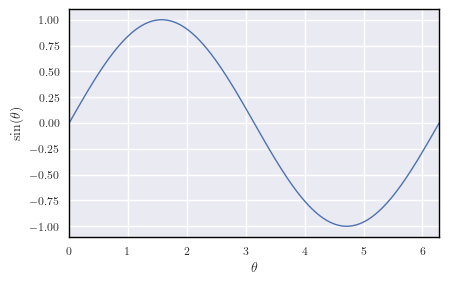

In [89]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



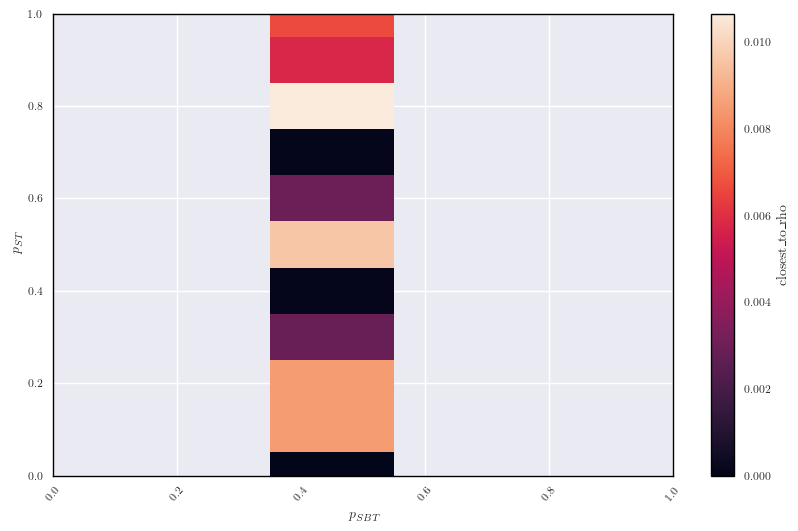

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))

colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True))

ax.tick_params(axis='x', which='major', rotation=50)
# ax.set_xticks(pv.columns)
# ax.set_yticks(pv.index)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

cbar = fig.colorbar(colormesh,ax = ax)

# ax.plot(pbs, rho_crits, color='black')

ax.set_xlabel(r'$p_{SBT}$')
ax.set_ylabel(r'$p_{ST}$')
# ax.set_xlabel('p_SB')

cbar.set_label("closest_to_rho")

AttributeError: 'DataFrame' object has no attribute 'ps'

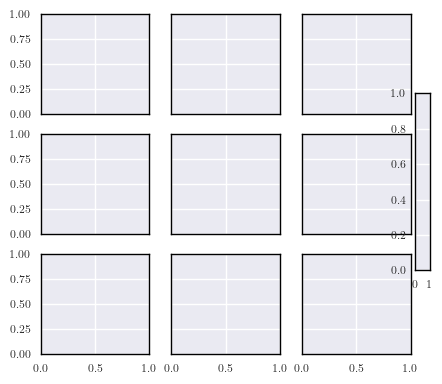

In [91]:

save_ = False

figsize = set_size(width)
figsize = (figsize[0], figsize[1]*1.5)

fig, axs = plt.subplots(3, 3, figsize=figsize, sharey=True, sharex = True)

cbar_ax = fig.add_axes([.91, .3, .03, .4])

qs = np.unique(get_index_row(df2_rho_correct_g_minerrs, 0))

minval = df2_rho_correct_g_minerrs.describe().closest_to_rho["min"]
maxval = df2_rho_correct_g_minerrs.describe().closest_to_rho["max"]

for i, (ax, q) in enumerate(zip(axs.flat, qs)):
    # if i == 11:
    #     continue
    inds2 = np.abs(get_index_row(df2_rho_correct_g_minerrs, 0) - q) < 1e-5
    
    df_temp = df2_rho_correct_g_minerrs[inds2].copy(deep=True)
    if q == 0:
        
        ps_true = np.unique(df_temp.ps)
        
        for ps in np.arange(0,1.1,0.1):
            ps = round(ps, 2)
            if ps == ps_true:
                continue
            # df_temp = df_temp.append(df2_w1000_g[inds2])
            # for i in range(len(df2_w1000_g[inds2])):
            #     df_temp['ps'][-i-1] = ps
            for ind, row in df2_rho_correct_g_minerrs[inds2].iterrows():
                new_ind = (ind[0], ind[1], ps)
                row.ps = ps
                # df_temp[new_ind] = row
                df_temp = df_temp.append(row, ignore_index = True)
                # print(ps)
    elif q == 1.:
        continue
        ph_true = np.unique(df_temp.p)
        
        for ph in np.arange(0,1.1,0.1):
            ph = round(ph, 2)
            if ph == ph_true:
                continue
            # df_temp = df_temp.append(df2_w1000_g[inds2])
            # for i in range(len(df2_w1000_g[inds2])):
            #     df_temp['ps'][-i-1] = ps
            for ind, row in df2_rho_correct_g_minerrs[inds2].iterrows():
                new_ind = (ind[0], ps, ind[2])
                row.p = ph
                # df_temp[new_ind] = row
                df_temp = df_temp.append(row, ignore_index = True)
                # print(ps)

    # df_temp
    
    pv = pd.pivot_table(df_temp, values = "closest_to_rho", index = "ps", columns = "p")
    # print(pv)
    colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True))

    ax.tick_params(axis='x', which='major', rotation=50)
    # ax.set_xticks(pv.columns)
    # ax.set_yticks(pv.index)
    
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    cbar = fig.colorbar(colormesh,ax = ax)

    # ax.set_xlabel(r'$p_{SBT}$')
    # ax.set_ylabel(r'$p_{ST}$')
    # # ax.set_xlabel('p_SB')

    # cbar.set_label("closest_to_rho")

    ax.set_title(r'$q={q}$'.format(q=round(q, 2)))
    
    # fmt = '{:0.1f}'
    # xticklabels = []
    # for item in ax.get_xticklabels():
    #     item.set_text(fmt.format(float(item.get_text())))
    #     xticklabels += [item]
        
    # if len(ax.get_yticklabels()) > 0:
    #     # print(q)
    #     yticklabels = []
        
    #     for item in ax.get_yticklabels():
    #         item.set_text(fmt.format(float(item.get_text())))
    #         yticklabels += [item]
    # else:
    #     yticklabels2 = []
    #     for item in yticklabels:
    #         item.set_text(fmt.format(float(item.get_text())))
    #         yticklabels2 += [item]
    #     ax.set_yticklabels(yticklabels2)
    
    
    if i%3 == 0:
        # print(yticklabels)
        # ax.set_yticklabels(yticklabels)
        # print(ax.get_yticklabels())
        ax.set_ylabel(r'$p_{ST}$')
    else:
        # print(ax.get_yticklabels())
        ax.set_ylabel('')
        ax.tick_params(left=False)
        # print(yticklabels)
    if i == 10:
        ax.set_xlabel(r'$p_{SBT}$')
    else:
        ax.set_xlabel('')
    if i < 9:
        ax.tick_params(bottom=False)
    # else:
        # ax.set_xticklabels(xticklabels)
    # else: break

# axs.fla

fig.suptitle(' closest_to_rho ')

/tmp/ipykernel_207980/1920176966.py:19: RuntimeWarning: divide by zero encountered in log10
  minval = np.log10(minval)
/home/pgorski/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/home/pgorski/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


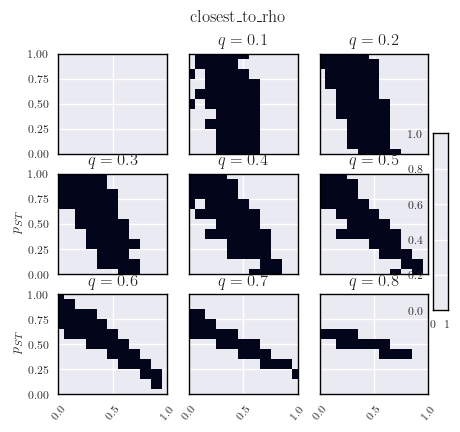

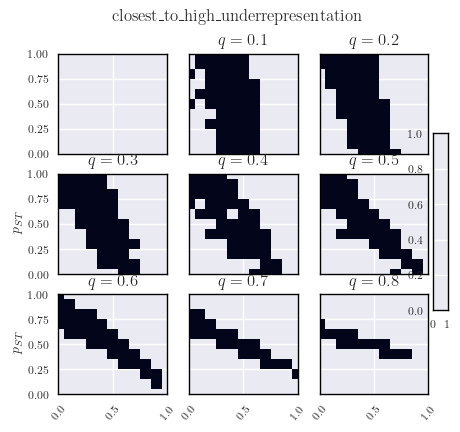

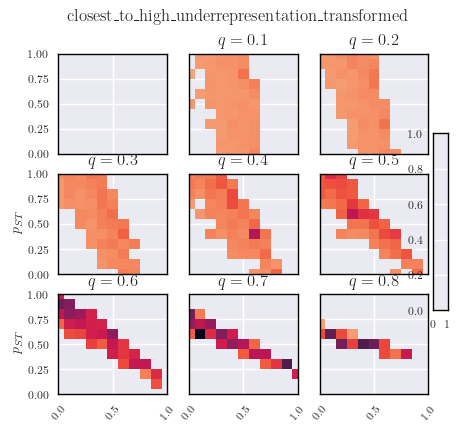

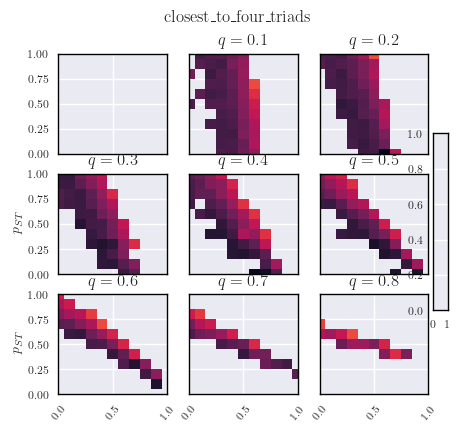

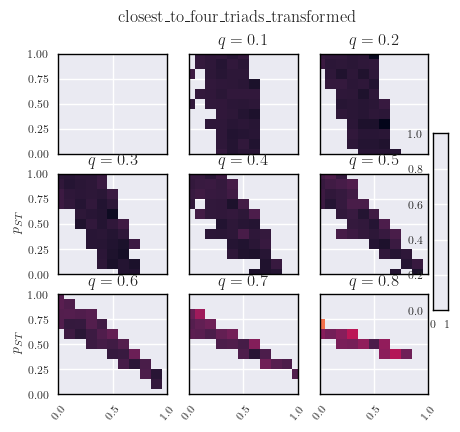

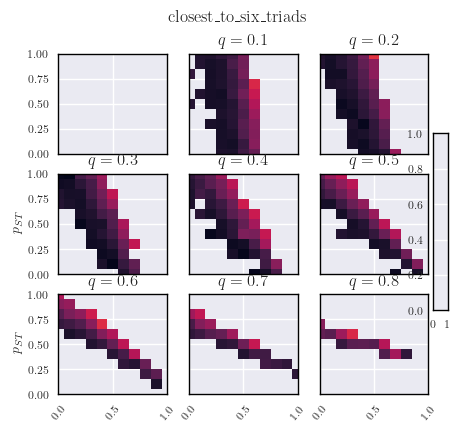

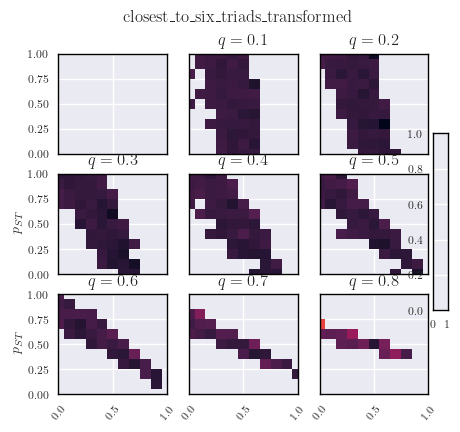

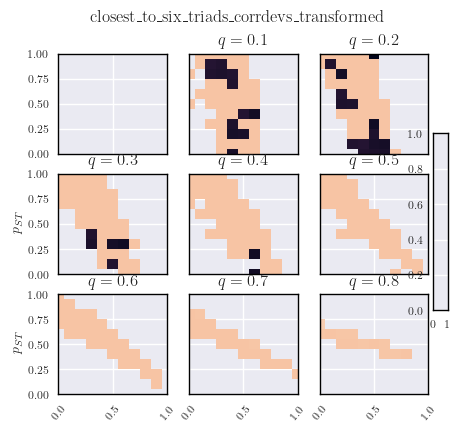

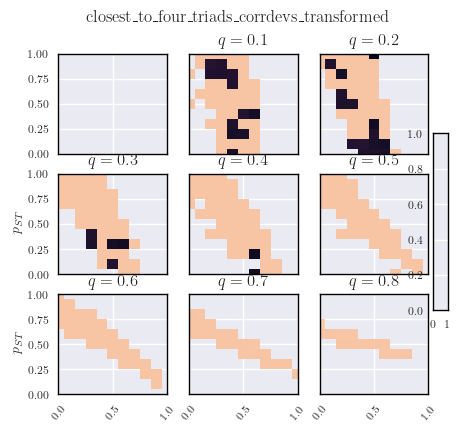

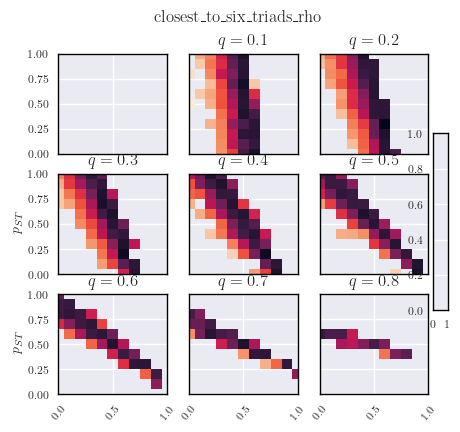

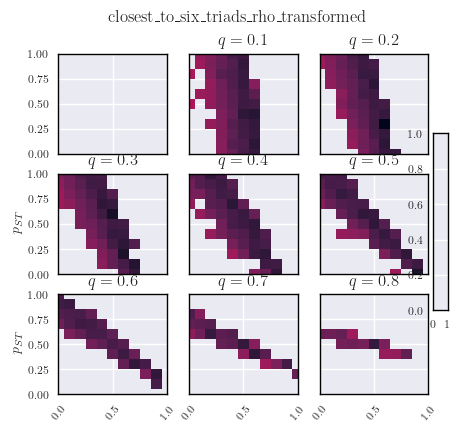

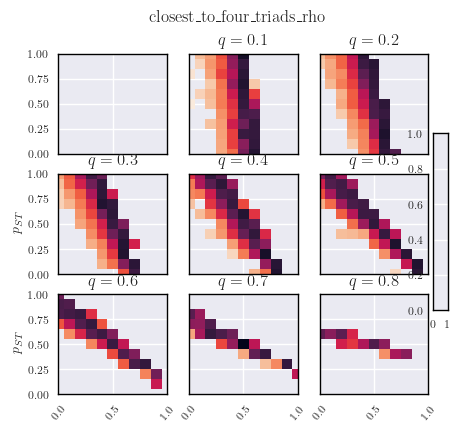

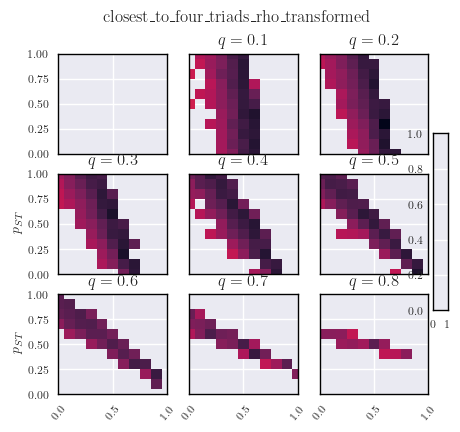

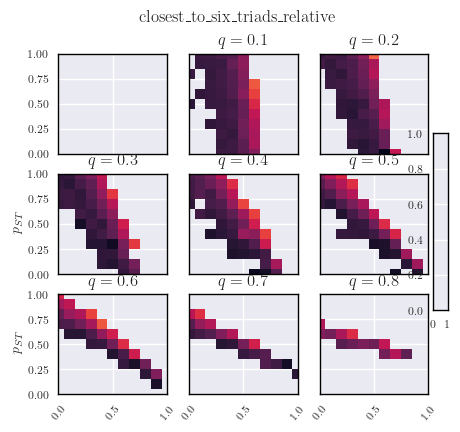

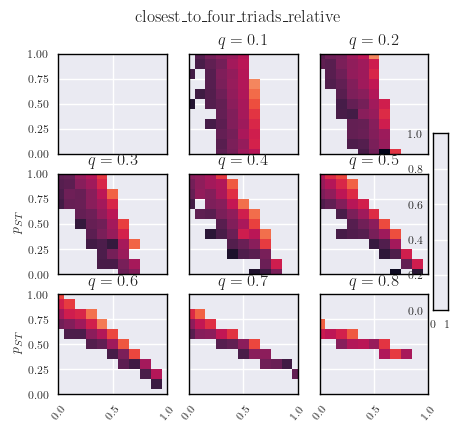

In [92]:

save_ = False
log = True

for error_fun in error_functions:
    error_fun_name = error_fun.__name__

    figsize = set_size(width)
    figsize = (figsize[0], figsize[1]*1.5)

    fig, axs = plt.subplots(3, 3, figsize=figsize, sharey=True, sharex = True)

    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    qs = np.unique(get_index_row(df2_rho_correct_g_minerrs, 0))

    minval = df2_rho_correct_g_minerrs.describe()[error_fun_name]["min"]
    maxval = df2_rho_correct_g_minerrs.describe()[error_fun_name]["max"]
    if log:
        minval = np.log10(minval)
        maxval = np.log10(maxval)
    
    for i, (ax, q) in enumerate(zip(axs.flat, qs)):
        # if i == 11:
        #     continue

        inds2 = np.abs(get_index_row(df2_rho_correct_g_minerrs, 0) - q) < 1e-5
    
        df_temp = df2_rho_correct_g_minerrs[inds2].copy(deep=True)
        if q == 0:
            continue
            ps_true = np.unique(df_temp.ps)
            
            for ps in np.arange(0,1.1,0.1):
                ps = round(ps, 2)
                if ps == ps_true:
                    continue
                # df_temp = df_temp.append(df2_w1000_g[inds2])
                # for i in range(len(df2_w1000_g[inds2])):
                #     df_temp['ps'][-i-1] = ps
                for ind, row in df2_rho_correct_g_minerrs[inds2].iterrows():
                    new_ind = (ind[0], ind[1], ps)
                    row.ps = ps
                    # df_temp[new_ind] = row
                    df_temp = df_temp.append(row, ignore_index = True)
                    # print(ps)
        elif q == 1.:
            continue
            ph_true = np.unique(df_temp.p)
            
            for ph in np.arange(0,1.1,0.1):
                ph = round(ph, 2)
                if ph == ph_true:
                    continue
                # df_temp = df_temp.append(df2_w1000_g[inds2])
                # for i in range(len(df2_w1000_g[inds2])):
                #     df_temp['ps'][-i-1] = ps
                for ind, row in df2_rho_correct_g_minerrs[inds2].iterrows():
                    new_ind = (ind[0], ps, ind[2])
                    row.p = ph
                    # df_temp[new_ind] = row
                    df_temp = df_temp.append(row, ignore_index = True)
                    # print(ps)

        # df_temp
        
        pv = pd.pivot_table(df_temp, values = error_fun_name, index = "ps", columns = "p")
        if log == True:
            pv = np.log10(pv)
        colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True),
                                  vmin = minval, vmax = maxval)

        ax.tick_params(axis='x', which='major', rotation=50)
        # ax.set_xticks(pv.columns)
        # ax.set_yticks(pv.index)
        
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])

        if i == 0:
            cbar = fig.colorbar(colormesh,cax = cbar_ax)#, fraction=0.046, pad=0.04)#,vmin = minval, vmax = maxval)
        
        
        # sns.heatmap(pv, square = True, ax = ax, cbar_ax = cbar_ax, cbar = i == 0, vmin = minval, vmax = maxval)
        
        ax.set_title(r'$q={q}$'.format(q=round(q, 2)))
        
        # fmt = '{:0.1f}'
        # xticklabels = []
        # for item in ax.get_xticklabels():
        #     item.set_text(fmt.format(float(item.get_text())))
        #     xticklabels += [item]
            
        # if len(ax.get_yticklabels()) > 0:
        #     # print(q)
        #     yticklabels = []
            
        #     for item in ax.get_yticklabels():
        #         item.set_text(fmt.format(float(item.get_text())))
        #         yticklabels += [item]
        # else:
        #     yticklabels2 = []
        #     for item in yticklabels:
        #         item.set_text(fmt.format(float(item.get_text())))
        #         yticklabels2 += [item]
        #     ax.set_yticklabels(yticklabels2)
        
        if i%3 == 0:
            # print(yticklabels)
            # ax.set_yticklabels(yticklabels)
            # print(ax.get_yticklabels())
            ax.set_ylabel(r'$p_{ST}$')
        else:
            # print(ax.get_yticklabels())
            ax.set_ylabel('')
            ax.tick_params(left=False)
            # print(yticklabels)
        if i == 10:
            ax.set_xlabel(r'$p_{SBT}$')
        else:
            ax.set_xlabel('')
        if i < 9:
            ax.tick_params(bottom=False)
        # else:
            # ax.set_xticklabels(xticklabels)
    
    fig.suptitle(error_fun_name)
    
    if save_:
        fname = "maps/map_long2_" + error_fun_name
        # fname = fname + filename_addon
        if log:
            fname = fname + "_log"
        fname = fname + ".pdf"
        
        fig.savefig(fname, format='pdf', bbox_inches='tight') 

## Barplots

In [60]:

def plot_bar_nets(ax, ydata, yerr, triads_set, title, labels, 
                  line_level = 1/3, linewidth = 2, colors=None, 
                  width = 0.15, smallest_edge = False, m = 1,
                  legend_elem = 3, real_net_data = None, additional_label_data = None, real_net_additional_label_data = None):
    n_simulated = ydata.copy()
    if yerr is not None:
        n_err = yerr.copy()
    else:
        n_err = None   
    if real_net_data is not None:
        data_name = real_net_data.columns[0]
        real_data = [val[0] for val in real_net_data.values]
        n_simulated[data_name] = real_data
        if yerr is not None:
            real_data_std = np.full(len(n_simulated.index), np.nan)
            n_err[data_name] = real_data_std
#     width = 0.15
    multiplier = 0
    x = np.arange(len(n_simulated.index))*3-1.5
    for i, col in enumerate(n_simulated.columns):
        offset = multiplier*width*4
        if labels is not None:
            label = labels[i]
        else:
            # label = col
            # print(col)
            if len(col) == 3:
                q, p, ps = col
            elif len(col) == 4:
                _, q, p, ps = col
            elif len(col) == 5:
                _, q, p, ps, step = col
            # elif len(col) == 1:
            #     if real_net_data is not None:
            #     else:
            #         raise ValueError("column contains array with only one value")
            else:
                q, p, ps = col[:3]
            if (i + 1 == len(n_simulated.columns)) and (real_net_data is not None):
                label = col[0]
                if real_net_additional_label_data is not None:
                    # print(real_net_additional_label_data)
                    label += r": $\rho={rho}$".format(rho = round(real_net_additional_label_data, 2))
            elif legend_elem == 3:
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            elif legend_elem == 4:
                rho_init = col[3]
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2), rho_init=round(rho_init,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            # print(lab)
        if n_err is not None:
            # print(n_err)
            # print(n_err[i])
            err = n_err[col[:4]]
            if np.any(np.isnan(err)):
                err = None
        else:
            err = None
        
        # print("H")
        if smallest_edge:
            edgecolor = [colors[i] if val else 'none' for ind, val in enumerate(n_simulated[col] < 0.01)]
        else:
            edgecolor = ['none' for ind, val in enumerate(n_simulated[col])]
        # print(n_simulated[col].values)
        # print(colors[i])
        rects = ax.bar(x=x+offset, height=n_simulated[col].values,
                       width=width, label=label, color=colors[i],
                       yerr=err,
                       edgecolor=edgecolor, linewidth=2)
        # ax.bar_label(rects, padding=3)
        # print("D")
        multiplier += m

    # print("F")
    ax.set_ylabel('Relative density')
    ax.set_title(title)
    if linewidth is not None:
        ax.hlines(y=line_level, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='black', linewidth=linewidth, ls='--')
    # ax.legend(loc='best')
    ax.set_xticks(x + width*m+1., triads_set)

def prepare_data4(df_g, triads_set, std_data = None, addon = "_lvl"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    # if not triads_set[0].endswith("_lvl"):
    #     col_names = [triad + "_lvl" for triad in triads_set]
    # else:
    #     col_names = triads_set
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
        else:
            col_names = [triad + addon + "_std" for triad in triads_set]
            yerr = std_data[col_names].copy()
            for col in yerr.columns:
                yerr[col] = yerr[col] / n_sum.values  
            yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

def prepare_data5(df_g, triads_set, std_data = None, addon = "_lvl"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values - 1/3
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
        else:
            col_names = [triad + addon + "_std" for triad in triads_set]
            # print(col_names)
            yerr = std_data[col_names].copy()
            # print(n_sum.values  )
            for col in yerr.columns:
                yerr[col] = yerr[col] / n_sum.values  
            yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

def prepare_data3(data, triads_sets_average, triads_set_final, std_data = None, norm_fun = prepare_data4):
    n_datas = [norm_fun(data, triads_set, std_data)[0] for triads_set in triads_sets_average]
    n_data = n_datas[0].append(n_datas[1])
    
    ydata = n_data.loc[triads_set_final]
    ydata = ydata.transpose()
    
    if std_data is not None:
        n_stds = [norm_fun(data, triads_set, std_data)[1] for triads_set in triads_sets_average]
        yerr = n_stds[0].append(n_stds[1])
        
        yerr = yerr.loc[triads_set_final]
        yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

In [61]:

df2_rho_correct_g.iloc[inds_g3[-1]]

q                                         0.600000
p                                         0.800000
ps                                        0.150000
rho_init                                  0.200000
repetitions                               1.000000
                                            ...   
closest_to_six_triads_rho_transformed     0.024210
closest_to_four_triads_rho                0.041073
closest_to_four_triads_rho_transformed    0.020155
closest_to_six_triads_relative            0.498755
closest_to_four_triads_relative           0.253945
Name: (0.6, 0.8, 0.15, 0.2), Length: 72, dtype: float64

In [62]:
prepare_data5(df2_rho_correct_g.iloc[[inds_g3[-1]]], n1_triads, addon = "_lvl3")

(               0.6
                0.8
               0.15
                0.2
 q              0.6
 p              0.8
 ps            0.15
 tr3_lvl3  0.045707
 tr5_lvl3 -0.048088
 tr6_lvl3  0.002381,
 None)

In [63]:
ydata, yerr = prepare_data5(df2_rho_correct_g.iloc[inds_g3], n1_triads)
ydata

0.30      0.10      0.80      0.40      0.50      0.55      0.65  \
             0.50      0.50      0.25      0.20      0.35      0.00      0.45   
             0.65      0.90      0.60      0.85      0.55      0.75      0.60   
              0.1       0.3       0.0       0.2       0.9       0.7       0.0   
q            0.30      0.10      0.80      0.40      0.50      0.55      0.65   
p            0.50      0.50      0.25      0.20      0.35      0.00      0.45   
ps           0.65      0.90      0.60      0.85      0.55      0.75      0.60   
tr3_lvl  0.001398 -0.005438  0.012208 -0.000649 -0.002607  0.000067  0.004312   
tr5_lvl -0.013754  0.008196 -0.083418 -0.020735 -0.024805 -0.034686 -0.049774   
tr6_lvl  0.012356 -0.002758  0.071211  0.021384  0.027412  0.034619  0.045463   

                       0.60            ...      0.70      0.10      0.50  \
             0.20      0.20      0.70  ...      0.50      0.60      0.85   
             0.75      0.85      0.20  ...      0.50      0.40      0.20   
              0.3       0.2       0.1  ...       0.0       0.8       0.0   
q            0.65      0.60      0.60  ...      0.70      0.10      0.50   
p            0.20      0.20      0.70  ...      0.50      0.60      0.85   
ps           0.75      0.85      0.20  ...      0.50      0.40      0.20   
tr3_lvl  0.002582  0.001974  0.015002  ...  0.004203  0.006974  0.000910   
tr5_lvl -0.049779 -0.046376 -0.026300  ... -0.066727 -0.007686 -0.017447   
tr6_lvl  0.047197  0.044402  0.011298  ...  0.062523  0.000713  0.016538   

                       0.55      0.60      0.65      0.60      0.55      0.60  
             1.00      0.85      0.80      1.00      0.90      0.85      0.80  
             0.00      0.05      0.15      0.10      0.10      0.05      0.15  
              0.7       0.3       0.2       0.8       0.7       0.3       0.2  
q            0.50      0.55      0.60      0.65      0.60      0.55      0.60  
p            1.00      0.85      0.80      1.00      0.90      0.85      0.80  
ps           0.00      0.05      0.15      0.10      0.10      0.05      0.15  
tr3_lvl  0.013526  0.002693  0.010512  0.037201  0.012684  0.002693  0.010512  
tr5_lvl -0.019634 -0.026614 -0.031921 -0.038382 -0.025954 -0.026614 -0.031921  
tr6_lvl  0.006108  0.023922  0.021409  0.001181  0.013269  0.023922  0.021409  

[3 rows x 45 columns]

In [64]:
ydata, yerr = prepare_data4(sampson, n1_triads)
ydata

,sampson
tr3,0.395570
tr5,0.306962
tr6,0.297468


In [65]:
ydata, yerr = prepare_data4(sampson, n2_triads)
ydata

,sampson
tr1,0.295669
tr2,0.280603
tr4,0.423729


/tmp/ipykernel_182128/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

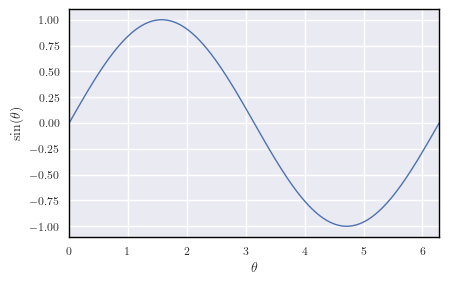

In [66]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]


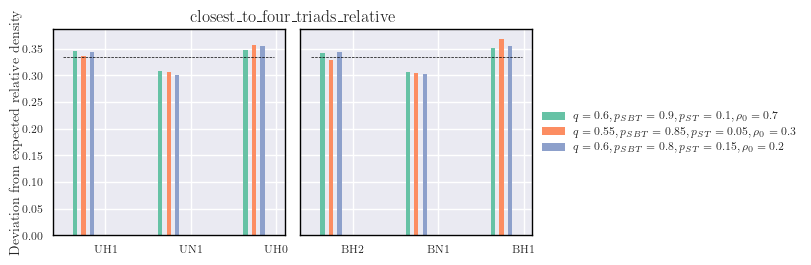

In [77]:
"""Many points
"""


save_ = False
fun_prepare_data = prepare_data4
linewidth = 0.5
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
addon = "_lvl"
which_group = 7 #there can be `group_size` bars (8 at max). If data has more, which to show
group_size = 6

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_rho_correct_g.iloc[inds_g3],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, None, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_rho_correct_g.iloc[inds_g3],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, None, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

try:
    plt.title(error_functions[0 + which_group*2].__name__ + " and " + error_functions[1 + which_group*2].__name__)
except IndexError:
    plt.title(error_functions[0 + which_group*2].__name__)

fname = 'barplots_sim'
fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [70]:
inds_g3[group_size*which_group:group_size*(which_group+1)]

[17373, 20249, 2727, 17373, 22764, 15498]

In [130]:
ydata, yerr = fun_prepare_data(df2_rho_correct_g.iloc[inds_g3],  triads_set, std_data = None)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
ydata

0.8                                                              \
              0.1                 0.0                                           
              0.9                 1.0                                           
              0.9                 0.9                                           
q             0.8                 0.8                                           
p             0.1                 0.0                                           
ps            0.9       0.9       1.0       1.0       1.0       1.0       1.0   
tr1_lvl  0.538871  0.538871  0.557429  0.557429  0.557429  0.557429  0.557429   
tr2_lvl  0.151230  0.151230  0.131741  0.131741  0.131741  0.131741  0.131741   
tr4_lvl  0.309899  0.309899  0.310831  0.310831  0.310831  0.310831  0.310831   

                        0.9       0.7       0.2       0.6  
                        0.2       1.0       0.9       1.0  
                        0.7       0.5       0.0       0.5  
                        0.8       0.4       0.6       0.4  
q                       0.9       0.7       0.2       0.6  
p                       0.2       1.0       0.9       1.0  
ps            1.0       0.7       0.5       0.0       0.5  
tr1_lvl  0.557429  0.561271  0.213196  0.187380  0.176332  
tr2_lvl  0.131741  0.115508  0.138307  0.224443  0.153624  
tr4_lvl  0.310831  0.323221  0.648498  0.588177  0.670044

In [252]:
inds_g[group_size*which_group:group_size*(which_group+1)]

[1865, 1831, 1845, 1610, 1865, 1626]

In [54]:
slash

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
slashdot,0.012361,0.051867,0.014518,0.024771,0.020277,0.020386,0.029772,0.826048,1251925.0,221397.0,285003.0,0.776823,15475.0,64934.0,18176.0,31011.0,25385.0,25522.0,37272.0,1034150.0


### Notes 

* I like $q=0.65$, $p_{SBT} = 0.8$, $p_{ST} = 0.4$, $\rho_0=0.0$ (probably very good under-reps of non-hierarchical triads, wrong overrep and lack of overrep for other triads; best in closest to 6 triads trans, )
* I like $q=0.65$, $p_{SBT} = 1.0$, $p_{ST} = 0.1$, $\rho_0=0.8$ (good Delta 1 discrepancies, but too small, wrong overrep and lack of overrep for Delta2; best in closest to 6 triads rel, )
* I like $q=0.60$, $p_{SBT} = 1.0$, $p_{ST} = 0.15$, $\rho_0=0.1$ (probably good under-reps of non-hierarchical triads, too small overrep, lack of overrep for other triads; best in closest to 6 triads rho trans, )
* I like $q=0.60$, $p_{SBT} = 0.7$, $p_{ST} = 0.2$, $\rho_0=0.1$ (slight overrep for UH1, overall not that good. Too small discrepancies. Correct underrep for nonhierarchical triads; best in closest to 4 triads, )
* I like $q=0.55$, $p_{SBT} = 0.85$, $p_{ST} = 0.05$, $\rho_0=0.3$ (correct tendencies for Delta 2, but too small discrepancies, wrong overrep and lack of overrep for UH0 and UH1; best in closest to 4 triads, 4 triads trans, 6 triads, 6 triads trans, 6 triads rel, 4 triads rel)
* I like $q=0.50$, $p_{SBT} = 0.75$, $p_{ST} = 0.0$, $\rho_0=0.8$ (correct tendencies for Delta 2, but too small discrepancies, not so bad but too small for Delta 1; best in closest to 6 triads)
* I like $q=0.50$, $p_{SBT} = 1.0$, $p_{ST} = 0.0$, $\rho_0=0.7$ (correct tendencies for Delta 2, but too small discrepancies, not so bad but too small for Delta 1; best in closest to 4 triads rho trans)


In [78]:
def get_inds(df, sets):
    """Finds inds looking for indexes but not exact values
    """
    inds = []
    for set_ in sets:
        q, p, ps, rho_init = set_
        ind_p = np.where((np.abs(df2_rho_correct_g.q - q) < 1e-8) & (np.abs(df2_rho_correct_g.p - p) < 1e-8) & 
                         (np.abs(df2_rho_correct_g.ps - ps) < 1e-8) & (np.abs(df2_rho_correct_g.rho_init - rho_init) < 1e-8) )
        if len(ind_p[0]) == 0:
            print("No index for " + set_)
        else:
            if len(ind_p[0]) > 1:
                print("Multiple points for " + set_)
            inds.extend(ind_p[0])
    return inds

In [79]:
sets = [(0.65, 0.8, 0.4, 0.), (0.65, 1., .1, 0.8), (0.6, 1., .15, 0.1),
        (0.6, 0.7, .2, 0.1), (0.55, 0.85, .05, 0.3), (0.5, 0.75, .0, 0.8), (0.5, 1., .0, 0.7)]


inds = get_inds(df2_rho_correct_g, sets)
df2_rho_correct_g.iloc[inds]

q     p    ps  rho_init  repetitions   rho_lvl  \
0.65 0.80 0.40 0.0  0.65  0.80  0.40       0.0            1  0.592012   
     1.00 0.10 0.8  0.65  1.00  0.10       0.8            1  0.417609   
0.60 1.00 0.15 0.1  0.60  1.00  0.15       0.1            6  0.514438   
     0.70 0.20 0.1  0.60  0.70  0.20       0.1            1  0.374769   
0.55 0.85 0.05 0.3  0.55  0.85  0.05       0.3            1  0.418242   
0.50 0.75 0.00 0.8  0.50  0.75  0.00       0.8            2  0.415008   
     1.00 0.00 0.7  0.50  1.00  0.00       0.7            1  0.510870   

                    rho_lvl_std  rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.65 0.80 0.40 0.0     0.000000              1  0.584173      0.000000  ...   
     1.00 0.10 0.8     0.000000              1  0.425384      0.000000  ...   
0.60 1.00 0.15 0.1     0.026848              6  0.508734      0.024143  ...   
     0.70 0.20 0.1     0.000000              1  0.393059      0.000000  ...   
0.55 0.85 0.05 0.3     0.000000              1  0.428756      0.000000  ...   
0.50 0.75 0.00 0.8     0.002298              2  0.411532      0.005385  ...   
     1.00 0.00 0.7     0.000000              1  0.517991      0.000000  ...   

                    closest_to_six_triads  closest_to_six_triads_transformed  \
0.65 0.80 0.40 0.0               0.003079                           0.005009   
     1.00 0.10 0.8               0.003255                           0.013683   
0.60 1.00 0.15 0.1               0.008800                           0.010548   
     0.70 0.20 0.1               0.002620                           0.013988   
0.55 0.85 0.05 0.3               0.001124                           0.005628   
0.50 0.75 0.00 0.8               0.001686                           0.009467   
     1.00 0.00 0.7               0.007515                           0.011314   

                    closest_to_six_triads_corrdevs_transformed  \
0.65 0.80 0.40 0.0                                    1.002112   
     1.00 0.10 0.8                                    1.005669   
0.60 1.00 0.15 0.1                                    1.004785   
     0.70 0.20 0.1                                    1.006320   
0.55 0.85 0.05 0.3                                    1.002500   
0.50 0.75 0.00 0.8                                    1.003672   
     1.00 0.00 0.7                                    1.003944   

                    closest_to_four_triads_corrdevs_transformed  \
0.65 0.80 0.40 0.0                                     1.002112   
     1.00 0.10 0.8                                     1.005669   
0.60 1.00 0.15 0.1                                     1.004785   
     0.70 0.20 0.1                                     1.006320   
0.55 0.85 0.05 0.3                                     1.002500   
0.50 0.75 0.00 0.8                                     1.003672   
     1.00 0.00 0.7                                     1.003944   

                    closest_to_six_triads_rho  \
0.65 0.80 0.40 0.0                   0.021678   
     1.00 0.10 0.8                   0.061982   
0.60 1.00 0.15 0.1                   0.010118   
     0.70 0.20 0.1                   0.100244   
0.55 0.85 0.05 0.3                   0.057521   
0.50 0.75 0.00 0.8                   0.068645   
     1.00 0.00 0.7                   0.007738   

                    closest_to_six_triads_rho_transformed  \
0.65 0.80 0.40 0.0                               0.012449   
     1.00 0.10 0.8                               0.037174   
0.60 1.00 0.15 0.1                               0.011075   
     0.70 0.20 0.1                               0.053037   
0.55 0.85 0.05 0.3                               0.028187   
0.50 0.75 0.00 0.8                               0.036251   
     1.00 0.00 0.7                               0.011404   

                    closest_to_four_triads_rho  \
0.65 0.80 0.40 0.0                    0.019730   
     1.00 0.10 0.8                    0.059051   
0.60 1.00 0.15 0.1                    0.004683   
     0.70 0.20 0

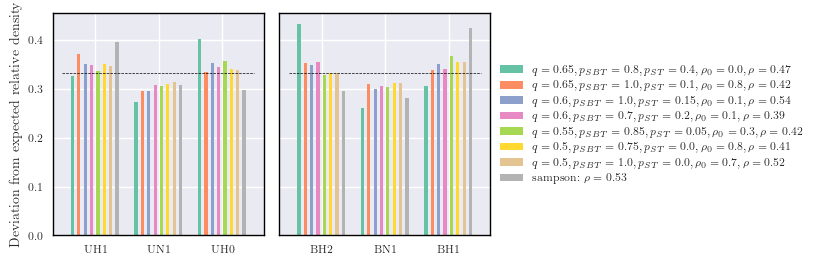

In [82]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = False
show_rho = True

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_rho_correct_g.iloc[inds],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
else:
    yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(sampson,  triads_set)
else:
    real_net_data = None

if show_rho:
    rhos = df2_rho_correct_g.iloc[inds].rho.values
    epi_rho = sampson.rho.values[0]
else:
    rhos = None
    epi_rho = None

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, yerr, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_rho_correct_g.iloc[inds],  triads_set, 
                               std_data = df2_rho_correct_g.iloc[inds], addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
else:
    yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(sampson,  triads_set)
else:
    real_net_data = None

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, yerr, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_sampson_rhoinit'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

if show_error:
    fname = fname + "_err"
if add_real_data:
    fname = fname + "_real"
if show_rho:
    fname = fname + "_rho"

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [254]:
sets = [(0.9, 0.0, 0.8, 0.0), (0.9, 0.8, 0.6, 0.4), (0.9, 0.8, 0.6, 0.2), 
        (0.925, 0.7, 0.6, 0.2), (0.925, 0.7, 0.6, 0.0)]

sets = [(0.9, 0.8, 0.6, 0.4), (0.9, 0.8, 0.6, 0.2), 
        (0.925, 0.7, 0.6, 0.2), (0.925, 0.7, 0.6, 0.0), (0.85, 0.6, 0.7, 0.4), 
        (0.85, 1.0, 0.5, 0.0), (0.9, 0.4, 0.7, 0.0), (0.925, 0.3, 0.7, 0.0)] 
        # (0.775, 1.0, 0.5, 0.0)]

sets = [(0.9, 0.8, 0.6, 0.4), (0.9, 0.8, 0.6, 0.2), 
        (0.925, 0.7, 0.6, 0.0), (0.85, 0.6, 0.7, 0.4), 
        (0.85, 1.0, 0.5, 0.0), (0.9, 0.4, 0.7, 0.0), (0.925, 0.3, 0.7, 0.0), 
        (0.775, 1.0, 0.5, 0.0)]

inds = get_inds(df2_joined_correct_g, sets)
df2_joined_correct_g.iloc[inds]

q    p   ps  rho_init  repetitions   rho_lvl  \
0.900 0.8 0.6 0.4  0.900  0.8  0.6       0.4            1  0.915134   
              0.2  0.900  0.8  0.6       0.2            1  0.891006   
0.925 0.7 0.6 0.0  0.925  0.7  0.6       0.0            1  0.851985   
0.850 0.6 0.7 0.4  0.850  0.6  0.7       0.4            1  0.913060   
      1.0 0.5 0.0  0.850  1.0  0.5       0.0            1  0.830820   
0.900 0.4 0.7 0.0  0.900  0.4  0.7       0.0            1  0.840841   
0.925 0.3 0.7 0.0  0.925  0.3  0.7       0.0            1  0.842721   
0.775 1.0 0.5 0.0  0.775  1.0  0.5       0.0            1  0.835193   

                   rho_lvl_std  rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.900 0.8 0.6 0.4          0.0              1  0.915134           0.0  ...   
              0.2          0.0              1  0.891006           0.0  ...   
0.925 0.7 0.6 0.0          0.0              1  0.851985           0.0  ...   
0.850 0.6 0.7 0.4          0.0              1  0.913060           0.0  ...   
      1.0 0.5 0.0          0.0              1  0.830820           0.0  ...   
0.900 0.4 0.7 0.0          0.0              1  0.840841           0.0  ...   
0.925 0.3 0.7 0.0          0.0              1  0.842721           0.0  ...   
0.775 1.0 0.5 0.0          0.0              1  0.835193           0.0  ...   

                   closest_to_six_triads  closest_to_six_triads_transformed  \
0.900 0.8 0.6 0.4               0.005310                           0.010699   
              0.2               0.003697                           0.008505   
0.925 0.7 0.6 0.0               0.001727                           0.008609   
0.850 0.6 0.7 0.4               0.005056                           0.008823   
      1.0 0.5 0.0               0.000820                           0.011800   
0.900 0.4 0.7 0.0               0.001503                           0.009449   
0.925 0.3 0.7 0.0               0.001845                           0.010226   
0.775 1.0 0.5 0.0               0.000774                           0.015972   

                   closest_to_six_triads_corrdevs_transformed  \
0.900 0.8 0.6 0.4                                    0.006890   
              0.2                                    0.008062   
0.925 0.7 0.6 0.0                                    0.007318   
0.850 0.6 0.7 0.4                                    0.007262   
      1.0 0.5 0.0                                    0.010422   
0.900 0.4 0.7 0.0                                    0.008631   
0.925 0.3 0.7 0.0                                    0.009665   
0.775 1.0 0.5 0.0                                    1.015712   

                   closest_to_four_triads_corrdevs_transformed  \
0.900 0.8 0.6 0.4                                     0.006890   
              0.2                                     0.008062   
0.925 0.7 0.6 0.0                                     0.007318   
0.850 0.6 0.7 0.4                                     0.007262   
      1.0 0.5 0.0                                     0.010422   
0.900 0.4 0.7 0.0                                     0.008631   
0.925 0.3 0.7 0.0                                     0.009665   
0.775 1.0 0.5 0.0                                     0.015712   

                   closest_to_six_triads_rho  \
0.900 0.8 0.6 0.4                   0.079833   
              0.2                   0.050445   
0.925 0.7 0.6 0.0                   0.018938   
0.850 0.6 0.7 0.4                   0.075343   
      1.0 0.5 0.0                   0.007907   
0.900 0.4 0.7 0.0                   0.015064   
0.925 0.3 0.7 0.0                   0.014670   
0.775 1.0 0.5 0.0                   0.009260   

                   closest_to_six_triads_rho_transformed  \
0.900 0.8 0.6 0.4                               0.040508   
              0.2                               0.027204   
0.925 0.7 0.6 0.0                               0.015493   
0.850 0.6 0.7 0.4                               0.036937   
      1.0 0.5 0.0                               0.0146

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7]


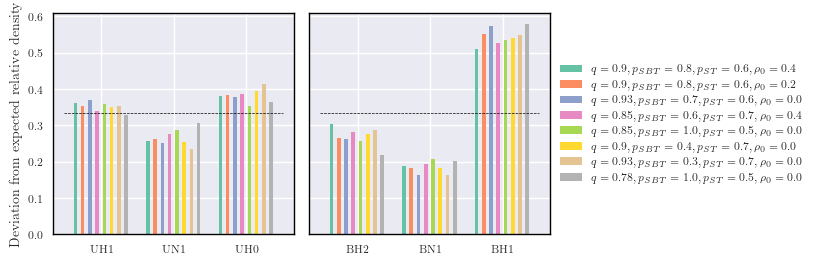

In [256]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl3"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
# which_group = 6 #there can be `group_size` bars (8 at max). If data has more, which to show
# group_size = 6

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_joined_correct_g.iloc[inds],  triads_set, 
                               std_data = None, addon = addon)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, None, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_joined_correct_g.iloc[inds],  triads_set, 
                               std_data = None, addon = addon)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, None, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_wiki_rhoinit_new'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [222]:
# 0.8, 0.4, 0.9 (looking good overall, best in closest to 4 triads transformed, 6 triads trans, 4 triads corrdev trans, )
# 0.8, 0.7, 0.7 (slightly worse than above, best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, )

sets_g = [(0.8, 0.4, 0.9), (0.8, 0.7, 0.7)]
df2_w1000_g.loc[sets_g]

q    p   ps  repetitions   rho_lvl  rho_lvl_std  rho_lvl_valid  \
0.8 0.4 0.9  0.8  0.4  0.9            1  0.965761          0.0              1   
    0.7 0.7  0.8  0.7  0.7            1  0.963461          0.0              1   

             rho_lvl2  rho_lvl2_std  rho_lvl2_valid  ...  \
0.8 0.4 0.9  0.965761           0.0               1  ...   
    0.7 0.7  0.963461           0.0               1  ...   

             closest_to_four_triads  closest_to_four_triads_transformed  \
0.8 0.4 0.9                0.007137                            0.002214   
    0.7 0.7                0.006283                            0.003106   

             closest_to_six_triads  closest_to_six_triads_transformed  \
0.8 0.4 0.9               0.012661                           0.003949   
    0.7 0.7               0.011340                           0.004401   

             closest_to_six_triads_corrdevs_transformed  \
0.8 0.4 0.9                                    1.002214   
    0.7 0.7                                    1.003106   

             closest_to_four_triads_corrdevs_transformed  \
0.8 0.4 0.9                                     0.002214   
    0.7 0.7                                     0.003106   

             closest_to_six_triads_rho  closest_to_six_triads_rho_transformed  \
0.8 0.4 0.9                   0.158921                               0.062453   
    0.7 0.7                   0.153692                               0.061342   

             closest_to_four_triads_rho  \
0.8 0.4 0.9                    0.153397   
    0.7 0.7                    0.148635   

             closest_to_four_triads_rho_transformed  
0.8 0.4 0.9                                0.060718  
    0.7 0.7                                0.060046  

[2 rows x 50 columns]

[0.  0.1 0.2 0.3 0.4 0.5 0.6]


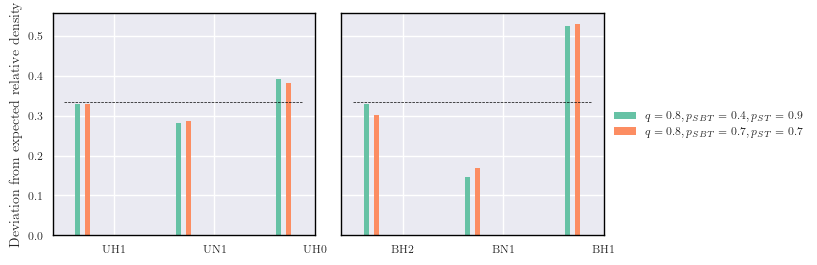

In [257]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
# which_group = 6 #there can be `group_size` bars (8 at max). If data has more, which to show
# group_size = 6

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_w1000_g.loc[sets_g],  triads_set, std_data = None)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, None, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_w1000_g.loc[sets_g],  triads_set, std_data = None)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, None, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_wiki2_s1000_sim_best_grouped'
fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [226]:
df2_w1000_g.loc[sets_g]

q    p   ps  repetitions   rho_lvl  rho_lvl_std  rho_lvl_valid  \
0.8 0.4 0.9  0.8  0.4  0.9            1  0.965761          0.0              1   
    0.7 0.7  0.8  0.7  0.7            1  0.963461          0.0              1   

             rho_lvl2  rho_lvl2_std  rho_lvl2_valid  ...  \
0.8 0.4 0.9  0.965761           0.0               1  ...   
    0.7 0.7  0.963461           0.0               1  ...   

             closest_to_four_triads  closest_to_four_triads_transformed  \
0.8 0.4 0.9                0.007137                            0.002214   
    0.7 0.7                0.006283                            0.003106   

             closest_to_six_triads  closest_to_six_triads_transformed  \
0.8 0.4 0.9               0.012661                           0.003949   
    0.7 0.7               0.011340                           0.004401   

             closest_to_six_triads_corrdevs_transformed  \
0.8 0.4 0.9                                    1.002214   
    0.7 0.7                                    1.003106   

             closest_to_four_triads_corrdevs_transformed  \
0.8 0.4 0.9                                     0.002214   
    0.7 0.7                                     0.003106   

             closest_to_six_triads_rho  closest_to_six_triads_rho_transformed  \
0.8 0.4 0.9                   0.158921                               0.062453   
    0.7 0.7                   0.153692                               0.061342   

             closest_to_four_triads_rho  \
0.8 0.4 0.9                    0.153397   
    0.7 0.7                    0.148635   

             closest_to_four_triads_rho_transformed  
0.8 0.4 0.9                                0.060718  
    0.7 0.7                                0.060046  

[2 rows x 50 columns]

In [239]:
i_l = (df_w1000.q == sets_g[0][0]) & (df_w1000.p == sets_g[0][1]) & (df_w1000.ps == sets_g[0][2])

np.where(i_l)[0]

df_w1000[i_l]

,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,Lplus
754,0,0.8,0.4,0.9,0.794729,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.7966249881495371, 0.887615476177936, 0.9146...","[0.008919260960182734, 0.001646694733395157, 0...","[0.0342410508784385, 0.014763886521662693, 0.0...","[0.03411355617617889, 0.009264167681032411, 0....","[0.13266561897335896, 0.08812568025133903, 0.0...","[0.03354184309025685, 0.011954976923458892, 0....","[0.12960977226762077, 0.0777113761509752, 0.05...","[0.12780739979251915, 0.07661223761254762, 0.0...","[0.49910149786144414, 0.719920980125589, 0.792...","[75626.0, 84264.0, 86831.0, 88252.0, 89266.0, ..."


In [251]:
a[0]

array([0.13266562, 0.08812568, 0.06833716, 0.05635668, 0.04968536,
       0.04329988, 0.03780553, 0.032181  , 0.03035179, 0.02830248,
       0.02518893, 0.02233036, 0.02092255, 0.02009451, 0.01952145,
       0.01741309, 0.01753656, 0.01662665, 0.01672462, 0.01599186,
       0.01677293, 0.01703732, 0.01477328, 0.01574358, 0.01669107,
       0.01536512, 0.01297493, 0.01307559, 0.01250388, 0.01132421,
       0.01295615, 0.01316953, 0.01302996, 0.01434651, 0.01351712,
       0.01472765, 0.01487393, 0.01584155, 0.01537989, 0.01635287,
       0.01474912, 0.01534097, 0.01630993, 0.01562011, 0.01390229,
       0.01542015, 0.01491822, 0.01685077, 0.01673267, 0.01464579,
       0.0147357 , 0.01527655, 0.01355067, 0.01475986, 0.01464847,
       0.01552751, 0.01646292, 0.01546309, 0.0150323 , 0.01457063,
       0.01488736, 0.01461358, 0.0166186 , 0.01568856, 0.01562146,
       0.01542015, 0.01596905, 0.01471423, 0.01519737, 0.01608715,
       0.01583753, 0.01442301, 0.01335608, 0.01455184, 0.01302

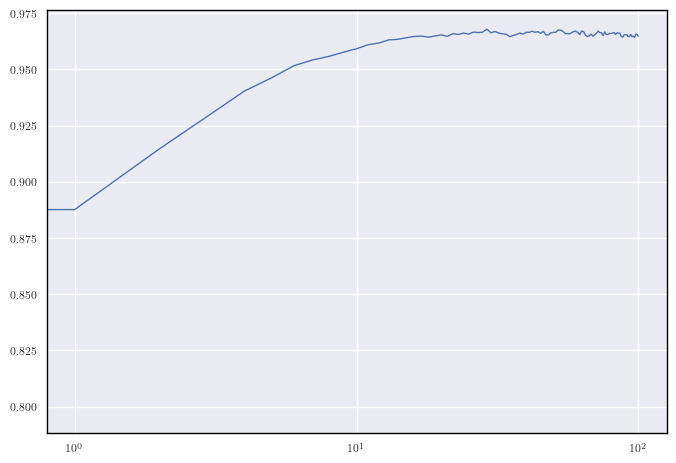

In [255]:
a = df_w1000[i_l]["rho"].values[0]
plt.plot(a)
    
# plt.legend(deg_triads)
plt.xscale('log')

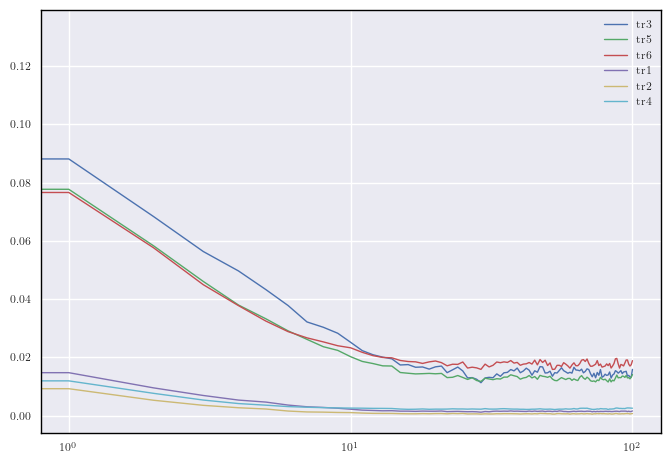

In [253]:
# inds = np.where(df_w1000.rho_init > 0)[0]
# inds2 = np.where(df_w1000.rho_init < 0)[0]

for triad in deg_triads:
    # print(triad)
    a = df_w1000[i_l][triad].values[0]
    plt.plot(a)
    
plt.legend(deg_triads)
plt.xscale('log')

[-0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4]


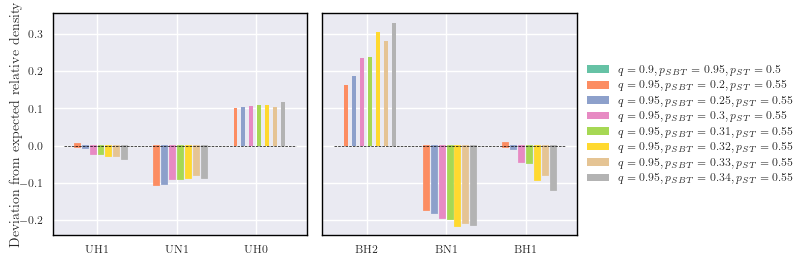

In [68]:
"""Many points
"""


save_ = False
fun_prepare_data = prepare_data5
linewidth = 0.5
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_eight = 0 #there can be 8 bars at max. If data has more, which to show

df_data = df32long_g

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df32long_g,  triads_set, std_data = df32long_g)

ydata = ydata[ydata.columns[8*which_eight:8*(which_eight+1)]]
yerr = yerr[yerr.columns[8*which_eight:8*(which_eight+1)]]

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, None, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df32long_g,  triads_set, std_data = df32long_g)

ydata = ydata[ydata.columns[8*which_eight:8*(which_eight+1)]]
yerr = yerr[yerr.columns[8*which_eight:8*(which_eight+1)]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, None, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_sim'
fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_eight)

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [58]:
col = ydata.columns[1]

In [60]:
[val for ind, val in enumerate(ydata[col] < 0.01)]

[False, True, True]

In [119]:
# Checking if detailed balance equation works
# Let me check pi+ and pi-when ps=0.5. In such a case pi+ and pi- are dependent only on psbt

def pi_plus_minus(pb, ps, q, BN1 = None, UN1 = None, UH0 = None, UH1 = None, UH2 = None, n1 = None, n2 = None, n3 = None, rho = None):
    tr_l = [BN1 , UN1 , UH0 , UH1 , UH2 , n1, n2, n3, rho]
    if not any(tr_l):
        if not any(np.array(tr_l) == 0):
            raise ValueError("Triads densities and link densities not given. ")
    if rho:
        n1 = 3*rho**2 * (1-rho)
        n2 = 3*rho*(1-rho)**2
        n3 = (1-rho)**3
    if all([n1, n2, n3]):
        BN1 = n2/3
        UN1 = n1/3
        UH0 = n1/3
        UH1 = n1/3
        UH2 = n3
    
    plus = q*(BN1 + UN1)*(1-ps) + (1-q)*((1-pb)*(UH1 + UN1) + UH0)
    minus = q*(BN1 + UN1)*ps + (1-q)*(pb*(UH1 + UN1) + UH2)
    return (plus,minus)


q = 0.95
# q=0.15
ps = 0.5
pb = 0.7422145328719724
rho = 0.85

plus,minus = pi_plus_minus(pb, ps, q, rho = rho)

# assert(abs(plus - minus) < 1e-5)
print(plus-minus, plus)

# q=0.95
row = df2_g.loc[(q,pb,ps)]

BN1 = row[triad_names_map['BN1'] + '_lvl']
UN1 = row[triad_names_map['UN1'] + '_lvl']
UH0 = row[triad_names_map['UH0'] + '_lvl']
UH1 = row[triad_names_map['UH1'] + '_lvl']
UH2 = row[triad_names_map['UH2'] + '_lvl']

# q=0.15
plus,minus = pi_plus_minus(pb, ps, q, BN1 = BN1, UN1=UN1, UH0=UH0, UH1=UH1, UH2=UH2)

# assert(abs(plus - minus) < 1e-5)
plus-minus, plus

0.0 0.068775


(2.2188545843876417e-05, 0.07305424308175813)

In [74]:
df2.iloc[[301]].p.values[0]

0.1833910034602075

In [58]:
q = 0.1
# q=0.15
ps = 0.8
pb = 0.7226066897347174
rho = 0.85

plus,minus = pi_plus_minus(pb, ps, q, rho = rho)

# assert(abs(plus - minus) < 1e-5)
print(plus-minus, plus)

# q=0.95
row = df2_g.loc[(q,pb,ps)]

BN1 = row[triad_names_map['BN1'] + '_lvl']
UN1 = row[triad_names_map['UN1'] + '_lvl']
UH0 = row[triad_names_map['UH0'] + '_lvl']
UH1 = row[triad_names_map['UH1'] + '_lvl']
UH2 = row[triad_names_map['UH2'] + '_lvl']

# q=0.15
plus,minus = pi_plus_minus(pb, ps, q, BN1 = BN1, UN1=UN1, UH0=UH0, UH1=UH1, UH2=UH2)

# assert(abs(plus - minus) < 1e-5)
plus-minus, plus

-2.7755575615628914e-17 0.15419999999999998


(0.00032214188978632596, 0.12281695480086882)

In [75]:
q = 0.95
# q=0.15
ps = 0.55
pb = 0.1833910034602075
rho = 0.85

plus,minus = pi_plus_minus(pb, ps, q, rho = rho)

# assert(abs(plus - minus) < 1e-5)
print(plus-minus, plus)

# q=0.95
row = df2_g.loc[(q,pb,ps)]

BN1 = row[triad_names_map['BN1'] + '_lvl']
UN1 = row[triad_names_map['UN1'] + '_lvl']
UH0 = row[triad_names_map['UH0'] + '_lvl']
UH1 = row[triad_names_map['UH1'] + '_lvl']
UH2 = row[triad_names_map['UH2'] + '_lvl']

# q=0.15
plus,minus = pi_plus_minus(pb, ps, q, BN1 = BN1, UN1=UN1, UH0=UH0, UH1=UH1, UH2=UH2)

# assert(abs(plus - minus) < 1e-5)
plus-minus, plus

0.0 0.068775


(0.00011295027692963255, 0.07286826851545948)

In [ ]:
301,603

In [80]:
df2.iloc[[301]]

,index,q,p,ps,rho_init,steps,rho,bp,tr0,tr1,...,tr5_qs_b,tr5_qs_f,tr6_qs_m,tr6_qs_s,tr6_qs_b,tr6_qs_f,tr7_qs_m,tr7_qs_s,tr7_qs_b,tr7_qs_f
301,0,0.95,0.183391,0.55,0.85,4000,"[0.8366935483870968, 0.8205645161290323, 0.819...",279.0,"[0.004737903225806452, 0.00625, 0.006989247311...","[0.021740591397849462, 0.02896505376344086, 0....",...,2001.0,3999.0,0.167669,0.007611,2004.0,3971.0,0.302656,0.073614,2000.0,3971.0


In [127]:
row.p.values

array([0.72260669])

In [198]:
row = df2.iloc[[512]]
pb = row.p.values[0]
ps = row.ps.values[0]
q = row.q.values[0]

s = row.steps.values[0]

pluss = np.zeros(s)
minuss = np.zeros(s)

for i in range(s):
    BN1 = row[triad_names_map['BN1']].values[0][i]
    UN1 = row[triad_names_map['UN1']].values[0][i]
    UH0 = row[triad_names_map['UH0']].values[0][i]
    UH1 = row[triad_names_map['UH1']].values[0][i]
    UH2 = row[triad_names_map['UH2']].values[0][i]
    # print(UH2)
    # break
    
    try:
        pluss[i], minuss[i] = pi_plus_minus(pb, ps, q, BN1 = BN1, UN1=UN1, UH0=UH0, UH1=UH1, UH2=UH2)
    except ValueError:
        print(i)
        break

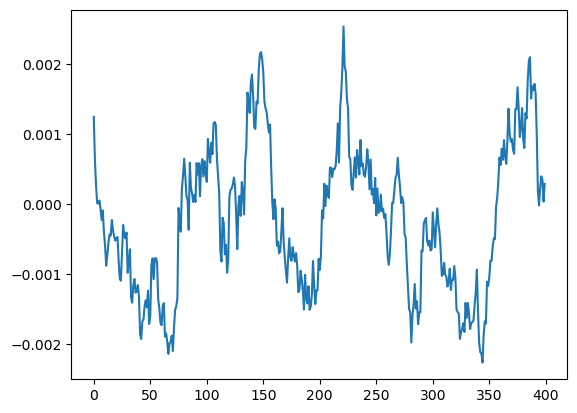

In [199]:
plt.plot(minuss - pluss)

In [130]:
beg = 200
np.mean(-pluss[beg:] + minuss[beg:])

0.0016557634083045026

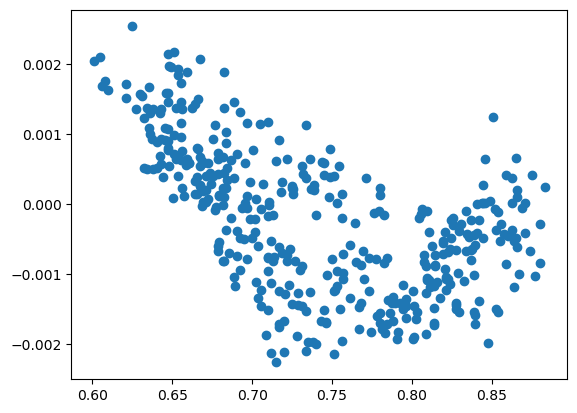

In [200]:
rho = row.rho.values[0]
# rho
# row.rho.values[0]
plt.scatter(rho, minuss - pluss)

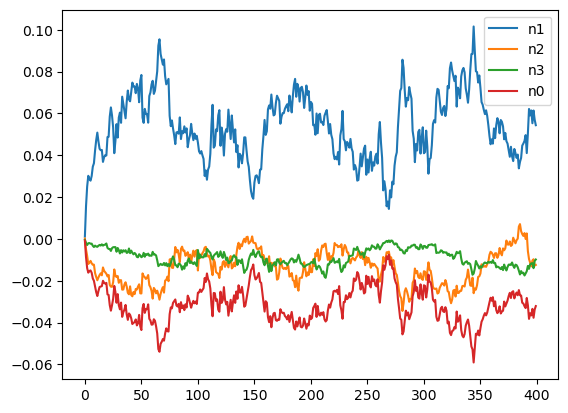

In [201]:
n1_rho = 3*rho**2*(1-rho) 
n2_rho = 3*rho*(1-rho)**2
n3_rho = (1-rho)**3 
n0_rho = rho**3

n2_true = row[triad_names_map['BN1']].values[0] + row[triad_names_map['BH1']].values[0] + row[triad_names_map['BH2']].values[0]
n1_true = row[triad_names_map['UN1']].values[0] + row[triad_names_map['UH1']].values[0] + row[triad_names_map['UH0']].values[0]
n3_true = row[triad_names_map['UH2']].values[0]
n0_true = row[triad_names_map['BH0']].values[0]

plt.plot(n1_rho - n1_true)
plt.plot(n2_rho - n2_true)
plt.plot(n3_rho - n3_true)
plt.plot(n0_rho - n0_true)

plt.legend(['n1', 'n2', 'n3', 'n0'])

/tmp/ipykernel_76370/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

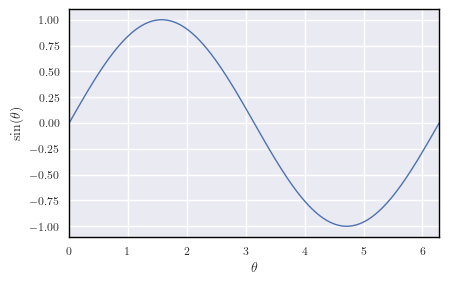

In [129]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



In [130]:
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])
figsize = (figsize[0] * 1.7, figsize[1] * 1.7)
# figsize = 

In [ ]:
"""Four triads
"""


save_ = True
fun_prepare_data = prepare_data2
linewidth = None
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'

reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

sim_data = mean_data.copy()
sim_data_std = std_data.copy()
real_data = results_realnet.copy()
if reverse:
    order = results_realnet.columns.tolist()
    order.reverse()
    real_data = results_realnet[order]
    
    order = mean_data.columns.tolist()
    order.reverse()
    sim_data = sim_data[order]
    std_data_std = std_data[order]

triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0] , figsize[1])
# figsize = 

if fun_prepare_data == prepare_data2:
    line_level = 0
else:
    line_level = 1/3


sim_pos = 0
real_pos = 1
if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)


# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:8]
sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
print(sim_labels)
# plot_bar_simulatednets(ax=axes[sim_pos, 0], triads_set=n1_triads, title='n1', labels=sim_labels, colors=colors)
triads_set = triads
ydata, yerr = prepare_data3(sim_data, all_sets, triads_set, std_data = sim_data_std)
print(ydata)
title = r'$\Delta_1$'
plot_bar_nets(axes[sim_pos], ydata, yerr, triads_set, None, labels = sim_labels, line_level = line_level, linewidth = linewidth, colors=colors[0:3][::-1], width = 0.2, smallest_edge = True)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
# triads_set = n2_triads
# ydata, yerr = fun_prepare_data(mean_data, triads_set, std_data = std_data)
# title = r'$\Delta_2$'

# plot_bar_nets(axes[sim_pos, 1], ydata, yerr, triads_set, title, labels = sim_labels, line_level = line_level, colors=colors, linewidth = linewidth)

# Realnets
triads_set = triads
ydata, _ = prepare_data3(real_data, all_sets, triads_set)

plot_bar_nets(axes[real_pos], ydata, None, triads_set, None, labels = None, line_level = line_level, colors=colors[3:], linewidth = linewidth, width = 0.2)
# plot_bar_realnets(ax=axes[real_pos, 1], triads_set=n2_triads, title='')
# triads_set = n2_triads

# ydata, _ = fun_prepare_data(results_realnet, triads_set)

# plot_bar_nets(axes[real_pos, 1], ydata, None, triads_set, None, labels = None, line_level = line_level, colors=colors, linewidth = linewidth)

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in (sim_pos, real_pos):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    axes[i].legend(loc='upper left')
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_sim_real'
fname = fname + "_down"
fname = fname + "_down_nx"
fname = fname + "_v2"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

if reverse is True:
    fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, format='pdf', bbox_inches='tight') 

### Time series of specific triad densities

In [ ]:

outputs_dir_triads_wiki2 = Path("../../outputs/LtdReal/outputs/wiki2-s400-triads")
outputs_dir_triads_wiki2_1000 = Path("../../outputs/LtdReal/outputs/wiki2-s1000-triads")

In [54]:
# df, rho_inits = process_folder(outputs_dir_test)
df_w2 = process_folder(outputs_dir_triads_wiki2, no_triad_stats=False)
# df.head(3)
df_w2_1000 = process_folder(outputs_dir_triads_wiki2_1000, no_triad_stats=False)
# df.head(3)
df_w2

,index,q,p,ps,rho_init,steps,rho,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,Lplus
0,0,0.8,1.0,1.0,0.794729,400,"[0.7905982007734993, 0.8482428115015974, 0.873...","[0.008964818904505015, 0.0041653903414844255, ...","[0.03393442118597251, 0.0231517585197214, 0.01...","[0.03433437356622422, 0.019660535401136187, 0....","[0.12985209787730959, 0.11106236180575156, 0.0...","[0.03431297143216393, 0.021628194101304326, 0....","[0.12943341862975513, 0.11174187956216584, 0.0...","[0.13076971437514462, 0.1045574506848014, 0.08...","[0.495107605917155, 0.6007418514718649, 0.6631...","[75227.0, 80712.0, 83113.0, 84673.0, 85902.0, ..."
1,1,0.8,1.0,1.0,0.794729,400,"[0.7962418025895409, 0.853371447788801, 0.8789...","[0.008188991544819413, 0.0036223111897045034, ...","[0.032602138340719296, 0.02187298100961892, 0....","[0.03272386297818721, 0.018075439847295774, 0....","[0.12632342102411886, 0.1076741364573315, 0.09...","[0.03322948839536162, 0.020282534922263437, 0....","[0.12943743152989143, 0.11000295616976707, 0.0...","[0.1288783007775663, 0.10135916927616645, 0.08...","[0.5053257872975659, 0.6138198930160824, 0.675...","[75764.0, 81200.0, 83631.0, 85276.0, 86389.0, ..."
2,0,0.8,1.0,1.0,-0.500000,400,"[0.7928997814023877, 0.8318164620817219, 0.851...","[0.012419925921863483, 0.0069623817364888995, ...","[0.02741479609785591, 0.020056474881251597, 0....","[0.01068902832973733, 0.007189779410879507, 0....","[0.07192053387623414, 0.0634921059566152, 0.05...","[0.04946166944671471, 0.03921941066548598, 0.0...","[0.0648712059701253, 0.05916084907616351, 0.05...","[0.07746903713136497, 0.06540893458839014, 0.0...","[0.6824632251143342, 0.7352194855729552, 0.771...","[75446.0, 79149.0, 80981.0, 82270.0, 83252.0, ..."
3,1,0.8,1.0,1.0,-0.500000,400,"[0.7929102909029763, 0.8312384395493526, 0.850...","[0.01241591302172718, 0.007276725580499446, 0....","[0.02741345846447714, 0.01987589437511788, 0.0...","[0.010690365963116098, 0.007045315005972533, 0...","[0.0719218715096129, 0.06312291914407515, 0.05...","[0.04946300708009348, 0.03939731590486217, 0.0...","[0.0648712059701253, 0.05971329166159481, 0.05...","[0.07747037476474374, 0.06528453468416469, 0.0...","[0.6824632251143342, 0.7349934255319434, 0.767...","[75447.0, 79094.0, 80888.0, 82113.0, 83105.0, ..."
4,2,0.8,1.0,1.0,-0.500000,400,"[0.7928997814023877, 0.8314486295611233, 0.850...","[0.012419925921863483, 0.007098820341123265, 0...","[0.02741479609785591, 0.0199467889441926, 0.01...","[0.01068902832973733, 0.007183091243985666, 0....","[0.07192053387623414, 0.061977904971849504, 0....","[0.04946166944671471, 0.038729836848856794, 0....","[0.0648712059701253, 0.059132758775209376, 0.0...","[0.07746903713136497, 0.06457291372665996, 0.0...","[0.6824632251143342, 0.7380673070363528, 0.774...","[75446.0, 79114.0, 80956.0, 82249.0, 83252.0, ..."
5,3,0.8,1.0,1.0,-0.500000,400,"[0.7928997814023877, 0.8307550025222802, 0.850...","[0.012419925921863483, 0.007375710450528298, 0...","[0.02741479609785591, 0.02028788545577851, 0.0...","[0.01068902832973733, 0.007045315005972533, 0....","[0.07192053387623414, 0.06359109082664405, 0.0...","[0.04946166944671471, 0.03900538932488306, 0.0...","[0.0648712059701253, 0.06028312348095009, 0.05...","[0.07746903713136497, 0.0657607321670062, 0.05...","[0.6824632251143342, 0.7333601751764672, 0.769...","[75446.0, 79048.0, 80937.0, 82295.0, 83321.0, ..."
6,4,0.8,1.0,1.0,-0.500000,400,"[0.7928997814023877, 0.8313330250546495, 0.851...","[0.012419925921863483, 0.0074305534190577975, ...","[0.02741479609785591, 0.02013138235046262, 0.0...","[0.01068902832973733, 0.007181753610606897, 0....","[0.07192053387623414, 0.06326069538208828, 0.0...","[0.04946166944671471, 0.03866964334681222, 0.0...","[0.0648712059701253, 0.059535386422218624, 0.0...","[0.07746903713136497, 0.06499961877448705, 0.0...","[0.6824632251143342, 0.7355003885824966, 0.769...","[75446.0, 79103.0, 81003.0, 82313.0, 83292.0, ..."
7,5,0.8,1.0,1.0,-0.500000,400,"[0.7928997814023877, 0.8319530855893728, 0.852..."

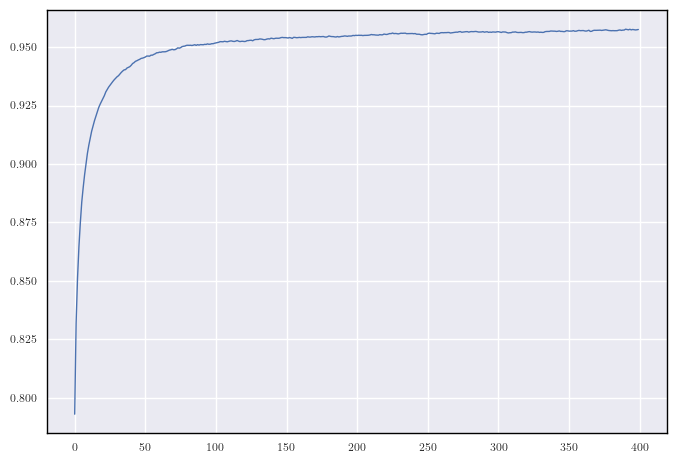

In [39]:
df_one = df_w2.iloc[0].rho
df_one
plt.plot(df_one)

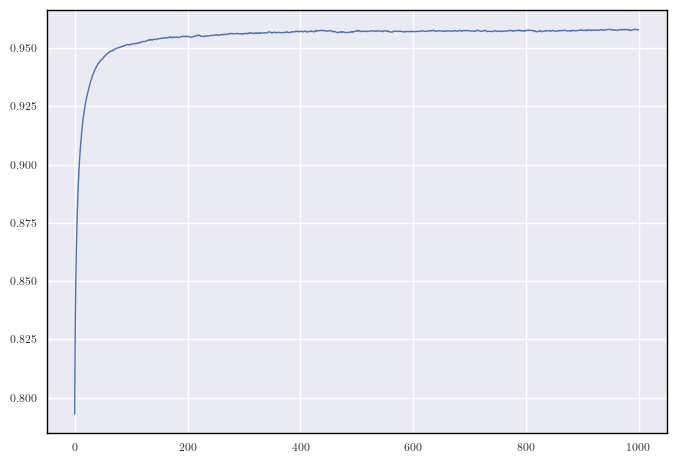

In [41]:
df_one = df_w2_1000.iloc[0].rho
df_one
plt.plot(df_one)

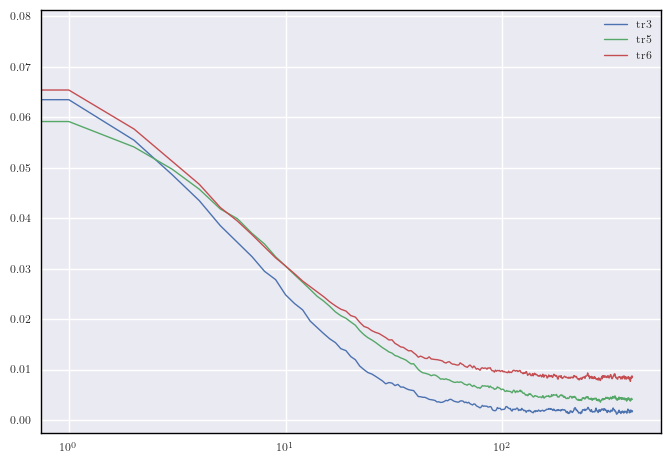

In [46]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in n1_triads:
    plt.plot(df_w2.iloc[0][triad])
    
plt.legend(n1_triads)
plt.xscale('log')

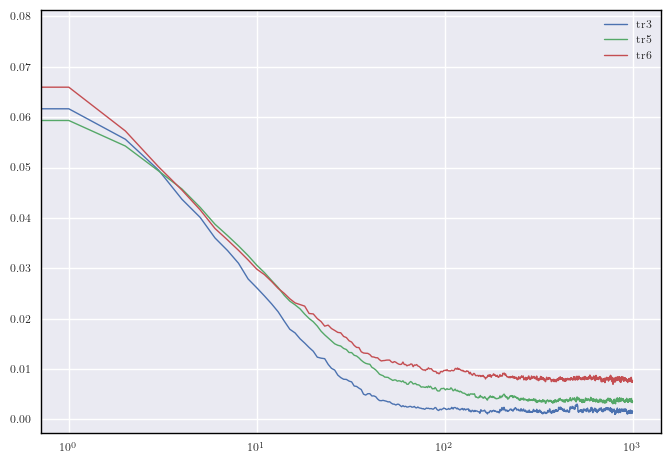

In [48]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in n1_triads:
    plt.plot(df_w2_1000.iloc[0][triad])
    
plt.legend(n1_triads)
plt.xscale('log')

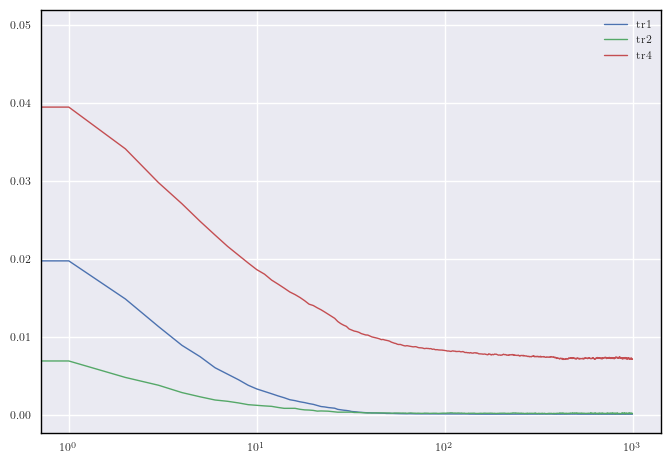

In [51]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in n2_triads:
    plt.plot(df_w2_1000.iloc[0][triad])
    
plt.legend(n2_triads)
plt.xscale('log')

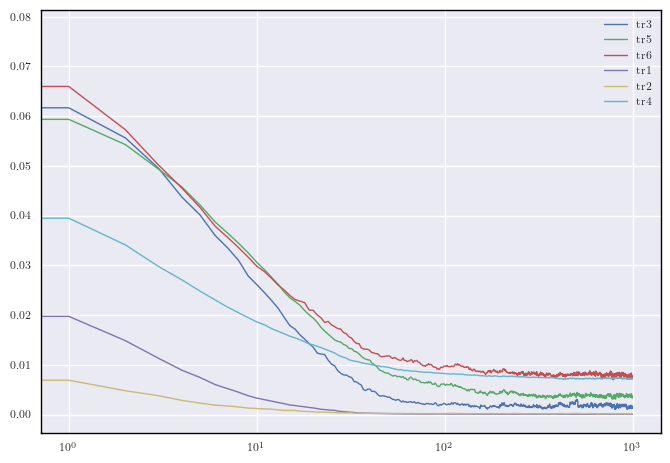

In [55]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in deg_triads:
    plt.plot(df_w2_1000.iloc[0][triad])
    
plt.legend(deg_triads)
plt.xscale('log')

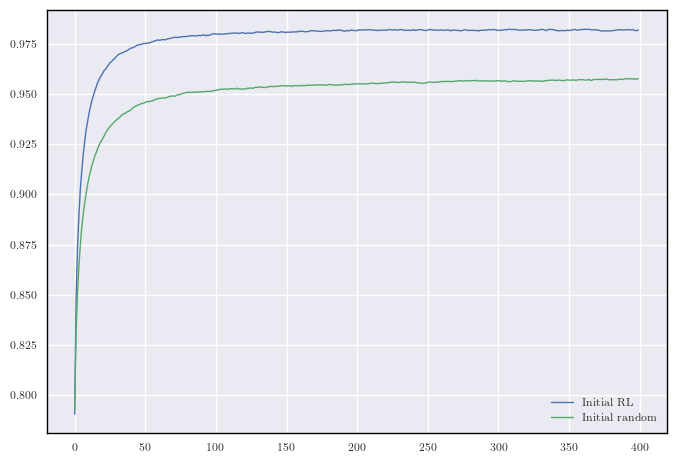

In [63]:
inds = np.where(df_w2.rho_init > 0)[0]
inds2 = np.where(df_w2.rho_init < 0)[0]

df_one = df_w2.loc[inds[0]].rho
df_one
plt.plot(df_one)
plt.plot(df_w2.loc[inds2[0]].rho)

plt.legend(["Initial RL", "Initial random"])

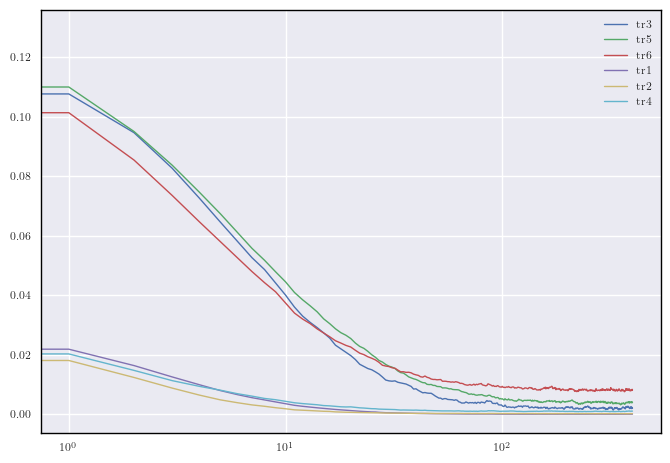

In [70]:
inds = np.where(df_w2.rho_init > 0)[0]
inds2 = np.where(df_w2.rho_init < 0)[0]

for triad in deg_triads:
    plt.plot(df_w2.loc[inds[1]][triad])
    
plt.legend(deg_triads)
plt.xscale('log')

In [51]:
wiki

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,rho
0,0.012999,0.027805,0.010694,0.071937,0.049472,0.064931,0.078229,0.683932,0.794729


In [53]:
wiki_trans

,tr1,tr2,tr3,tr4,tr5,tr6,rho
0,-0.017263,-0.211768,0.001105,0.229031,-0.031463,0.030358,0.794729


# Checking strange result of transformed error functions. 

Eg when q=0 or q=1

In [89]:
df2_w1000_g.columns

Index(['q', 'p', 'ps', 'repetitions', 'rho_lvl', 'rho_lvl_std',
       'rho_lvl_valid', 'rho_lvl2', 'rho_lvl2_std', 'rho_lvl2_valid',
       'rho_lvl_exp', 'tr_valid', 'tr0_lvl', 'tr0_lvl_std', 'tr1_lvl',
       'tr1_lvl_std', 'tr2_lvl', 'tr2_lvl_std', 'tr3_lvl', 'tr3_lvl_std',
       'tr4_lvl', 'tr4_lvl_std', 'tr5_lvl', 'tr5_lvl_std', 'tr6_lvl',
       'tr6_lvl_std', 'tr7_lvl', 'tr7_lvl_std', 'rho', 'tr0', 'tr1', 'tr2',
       'tr3', 'tr4', 'tr5', 'tr6', 'tr7', 'closest_to_rho',
       'closest_to_high_underrepresentation',
       'closest_to_high_underrepresentation_transformed',
       'closest_to_four_triads', 'closest_to_four_triads_transformed',
       'closest_to_six_triads', 'closest_to_six_triads_transformed',
       'closest_to_six_triads_corrdevs_transformed',
       'closest_to_four_triads_corrdevs_transformed',
       'closest_to_six_triads_rho', 'closest_to_six_triads_rho_transformed',
       'closest_to_four_triads_rho', 'closest_to_four_triads_rho_transformed'],
      d

In [94]:
triad_lbs = []
for triad in deg_triads:
    triad_lbs.append(triad + "_lvl")

df2_w1000_g.loc[(0., 1., 0.5)][triad_lbs]

tr3_lvl    0.006883
tr5_lvl    0.013687
tr6_lvl    0.015746
tr1_lvl    0.000160
tr2_lvl    0.001274
tr4_lvl    0.006462
Name: (0.0, 1.0, 0.5), dtype: float64

In [100]:
df2_w1000_g.loc[(0., 1., 0.5)][deg_triads]

tr3    0.006883
tr5    0.013687
tr6    0.015746
tr1    0.000160
tr2    0.001274
tr4    0.006462
Name: (0.0, 1.0, 0.5), dtype: float64

In [107]:
# a = transform_data(df2_w1000_g.loc[(0., 1., 0.5)], triads_groups=(n1_triads, n2_triads))
df2_w1000_g_trans.loc[(0., 1., 0.5)][deg_triads]

tr3    0.006883
tr5    0.013687
tr6    0.015746
tr1    0.000160
tr2    0.001274
tr4    0.006462
Name: (0.0, 1.0, 0.5), dtype: float64

In [136]:
i_l = np.where(df2_w1000_g_trans['rho_lvl'] != df2_w1000_g['rho_lvl'])[0]

df2_w1000_g_trans.iloc[i_l]

q    p    ps  repetitions  rho_lvl  rho_lvl_std  \
1.0 0.5 0.40  1.0  0.5  0.40            1      NaN          NaN   
        0.45  1.0  0.5  0.45            1      NaN          NaN   
        0.55  1.0  0.5  0.55            1      NaN          NaN   
        0.70  1.0  0.5  0.70            1      NaN          NaN   

              rho_lvl_valid  rho_lvl2  rho_lvl2_std  rho_lvl2_valid  ...  \
1.0 0.5 0.40              0       NaN           NaN               0  ...   
        0.45              0       NaN           NaN               0  ...   
        0.55              0       NaN           NaN               0  ...   
        0.70              0       NaN           NaN               0  ...   

              tr6_lvl_std   tr7_lvl  tr7_lvl_std  rho       tr1           tr2  \
1.0 0.5 0.40          0.0  0.004639          0.0  NaN  0.083326  8.699612e-03   
        0.45          0.0       NaN          NaN  NaN  0.169760  3.071301e-02   
        0.55          0.0  0.943591          0.0  NaN  0.005186  3.999308e-05   
        0.70          0.0  0.984968          0.0  NaN  0.000829  1.059513e-07   

                   tr3       tr4       tr5       tr6  
1.0 0.5 0.40       NaN  0.036481  0.000348  0.024119  
        0.45       NaN  0.136467  0.007304  0.097028  
        0.55  0.019391  0.000537  0.003382  0.020188  
        0.70  0.002794  0.000162  0.000093  0.011131  

[4 rows x 35 columns]

In [143]:
df_w1000_trans.columns, df_w1000.columns

(Index(['index', 'q', 'p', 'ps', 'rho_init', 'steps', 'cur_steps', 'rho', 'tr1',
        'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'Lplus'],
       dtype='object'),
 Index(['index', 'q', 'p', 'ps', 'rho_init', 'steps', 'cur_steps', 'rho', 'tr0',
        'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'tr7', 'Lplus'],
       dtype='object'))

In [144]:
ch_cols = ['q', 'p', 'ps', 'repetitions', 'rho_lvl', 'rho_lvl_std',
        'rho_lvl_valid', 'rho_lvl2', 'rho_lvl2_std', 'rho_lvl2_valid',
        'rho_lvl_exp', 'tr_valid', 'tr0_lvl', 'tr0_lvl_std', 'tr1_lvl',
        'tr1_lvl_std', 'tr2_lvl', 'tr2_lvl_std', 'tr3_lvl', 'tr3_lvl_std',
        'tr4_lvl', 'tr4_lvl_std', 'tr5_lvl', 'tr5_lvl_std', 'tr6_lvl',
        'tr6_lvl_std', 'tr7_lvl', 'tr7_lvl_std', 'rho', 'tr1', 'tr2', 'tr3',
        'tr4', 'tr5', 'tr6']

ch_cols2 = [ 'q', 'p', 'ps', 'rho_init', 'steps', 'cur_steps', 'rho', 'tr1',
        'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'Lplus']

df2_w1000_g[ch_cols].equals(df2_w1000_g_trans[ch_cols]), df_w1000[ch_cols2].equals(df_w1000_trans[ch_cols2])

(True, False)

In [168]:
t_trans = transform_data(df2_w1000_g, triads_groups = (n1_triads, n2_triads))

df2_w1000_g[ch_cols].equals(t_trans[ch_cols])

# type(df2_w1000_g) == pd.DataFrame

# t_trans = df2_w1000_g.copy(deep=True)
# triads = n1_triads
# nn = transform_data(df2_w1000_g, triads)
# nn = nn.transpose()
# nn
# new_df = pd.DataFrame(nn, index = t_trans.index, columns=triads)
# new_df
# t_trans.update(new_df)

# df2_w1000_g[ch_cols].equals(t_trans[ch_cols])
# np.min(t_trans.tr3), np.min(new_df.tr3)

False

In [165]:
new_df.columns, t_trans.columns
new_df
t_trans.index

MultiIndex([( 0.0,  0.7,  0.5),
            ( 0.0, 0.75,  0.5),
            ( 0.0,  0.8,  0.5),
            ( 0.0,  0.9,  0.5),
            ( 0.0,  1.0,  0.5),
            ( 0.1,  0.7,  0.0),
            ( 0.1,  0.7,  0.1),
            ( 0.1,  0.7,  0.2),
            ( 0.1,  0.7,  0.3),
            ( 0.1,  0.7,  0.4),
            ...
            (0.95,  0.9, 0.45),
            (0.95,  1.0,  0.4),
            (0.95,  1.0, 0.45),
            ( 1.0,  0.5,  0.3),
            ( 1.0,  0.5,  0.4),
            ( 1.0,  0.5, 0.45),
            ( 1.0,  0.5,  0.5),
            ( 1.0,  0.5, 0.55),
            ( 1.0,  0.5,  0.6),
            ( 1.0,  0.5,  0.7)],
           length=615)

In [90]:
df2_w1000_g.loc[(0., 1., 0.5)][error_functions_names]

closest_to_rho                                     0.029148
closest_to_high_underrepresentation                0.000089
closest_to_high_underrepresentation_transformed    0.045173
closest_to_four_triads                             0.007320
closest_to_four_triads_transformed                 0.047704
closest_to_six_triads                              0.013444
closest_to_six_triads_transformed                  0.098376
closest_to_six_triads_corrdevs_transformed         1.047704
closest_to_four_triads_corrdevs_transformed        1.047704
closest_to_six_triads_rho                          0.159186
closest_to_six_triads_rho_transformed              0.156672
closest_to_four_triads_rho                         0.153062
closest_to_four_triads_rho_transformed             0.106000
Name: (0.0, 1.0, 0.5), dtype: float64

In [81]:
df2_w1000_g.loc[(0., 1., 0.5)]

q                                                  0.000000
p                                                  1.000000
ps                                                 0.500000
repetitions                                        1.000000
rho_lvl                                            0.965458
rho_lvl_std                                        0.000000
rho_lvl_valid                                      1.000000
rho_lvl2                                           0.965458
rho_lvl2_std                                       0.000000
rho_lvl2_valid                                     1.000000
rho_lvl_exp                                             NaN
tr_valid                                           1.000000
tr0_lvl                                            0.000076
tr0_lvl_std                                        0.000000
tr1_lvl                                            0.000160
tr1_lvl_std                                        0.000000
tr2_lvl                                 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbf4a1648b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbf4a1693a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbf4a164220>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbf4a1697c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbf4a169a60>],
 'means': []}

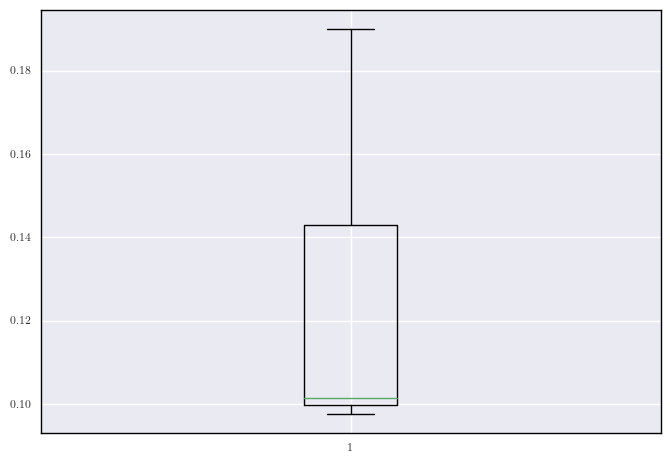

In [91]:
plt.boxplot(df2_w1000_g.closest_to_six_triads_transformed)